In [8]:
## this package can open hyperspectral images
# !pip install spectral

# from google.colab import drive
# drive.mount('/content/drive')

In [10]:
import spectral
import spectral.io.envi as envi
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

import matplotlib
import numpy as np
import glob
import pandas as pd
import seaborn as sns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# matplotlib.rcParams['figure.dpi'] = 300


In [15]:
# C:\Users\ADMIN\OneDrive - Rutgers University\HyperSpectral\DATA

# For google colab
# prefix = '/content/drive/'
# cloud = '/My Drive/'

# For desktop jupyter
# prefix = ''
# cloud = '/My Drive/'

prefix = 'C:/Users/ADMIN/' # GETAC
# prefix = 'C:/Users/David/' # office desktop
cloud = '/OneDrive - Rutgers University/'

date = '2024-04-23'

project = prefix + cloud + '/HyperSpectral/DATA/' + date + '-Sediment-Speed2-David/'

folders = [\
          #  '/size20/', \
          #  '/size040/', \
          #  '/size060/', \
          #  '/size100/', \
          #  '/water/'\
           ]

print('Folders in path:')
for folder in folders:
  path = project + folder
  print(path)
# path = prefix + '/My Drive/HyperSpectral/DATA/2022-07-25 srinidhi_sediments/'
# img = envi.open(hfile)
# img
print('End folders in path:')

print('Files in path:')
for fname in sorted(glob.glob(project + '/*float32.hdr')):
    print(fname)
    # img = envi.open(fname)
    # print(img.shape)
    # break
print('End files in path:')

Folders in path:
End folders in path:
Files in path:
C:/Users/ADMIN//OneDrive - Rutgers University//HyperSpectral/DATA/2024-04-23-Sediment-Speed2-David\size_000_000_mass_00g_water_500mL_Baldur_V-1024N_SN10008_HSNR1_29900us_2024-04-23T201738_raw_rad_float32.hdr
C:/Users/ADMIN//OneDrive - Rutgers University//HyperSpectral/DATA/2024-04-23-Sediment-Speed2-David\size_200_999_mass_00-5g_water_500mL_Baldur_V-1024N_SN10008_HSNR1_29900us_2024-04-23T201952_raw_rad_float32.hdr
C:/Users/ADMIN//OneDrive - Rutgers University//HyperSpectral/DATA/2024-04-23-Sediment-Speed2-David\size_200_999_mass_00-5g_water_500mL_Baldur_V-1024N_SN10008_HSNR1_29900us_2024-04-23T202127_raw_rad_float32.hdr
C:/Users/ADMIN//OneDrive - Rutgers University//HyperSpectral/DATA/2024-04-23-Sediment-Speed2-David\size_200_999_mass_01-0g_water_500mL_Baldur_V-1024N_SN10008_HSNR1_29900us_2024-04-23T202319_raw_rad_float32.hdr
C:/Users/ADMIN//OneDrive - Rutgers University//HyperSpectral/DATA/2024-04-23-Sediment-Speed2-David\size_200_9

In [12]:
# this information is in the HDR file of each image
bands = [398.05223904,  403.45018052,  408.848122  ,  414.24606348,
         419.64400496,  425.04194644,  430.43988792,  435.8378294 ,
         441.23577088,  446.63371236,  452.03165384,  457.42959532,
         462.8275368 ,  468.22547829,  473.62341977,  479.02136125,
         484.41930273,  489.81724421,  495.21518569,  500.61312717,
         506.01106865,  511.40901013,  516.80695161,  522.20489309,
         527.60283457,  533.00077605,  538.39871753,  543.79665901,
         549.19460049,  554.59254197,  559.99048345,  565.38842493,
         570.78636641,  576.18430789,  581.58224937,  586.98019085,
         592.37813233,  597.77607381,  603.17401529,  608.57195677,
         613.96989825,  619.36783973,  624.76578121,  630.16372269,
         635.56166417,  640.95960565,  646.35754713,  651.75548861,
         657.15343009,  662.55137157,  667.94931305,  673.34725453,
         678.74519601,  684.14313749,  689.54107897,  694.93902045,
         700.33696193,  705.73490341,  711.13284489,  716.53078638,
         721.92872786,  727.32666934,  732.72461082,  738.1225523 ,
         743.52049378,  748.91843526,  754.31637674,  759.71431822,
         765.1122597 ,  770.51020118,  775.90814266,  781.30608414,
         786.70402562,  792.1019671 ,  797.49990858,  802.89785006,
         808.29579154,  813.69373302,  819.0916745 ,  824.48961598,
         829.88755746,  835.28549894,  840.68344042,  846.0813819 ,
         851.47932338,  856.87726486,  862.27520634,  867.67314782,
         873.0710893 ,  878.46903078,  883.86697226,  889.26491374,
         894.66285522,  900.0607967 ,  905.45873818,  910.85667966,
         916.25462114,  921.65256262,  927.0505041 ,  932.44844558,
         937.84638706,  943.24432854,  948.64227002,  954.0402115 ,
         959.43815298,  964.83609447,  970.23403595,  975.63197743,
         981.02991891,  986.42786039,  991.82580187,  997.22374335,
        1002.62168483]

bands = np.around(np.linspace(398.0522,1002.6217,113),decimals=1)
# bands = np.linspace(398.0522,1002.6217,113)
bands

array([ 398.1,  403.5,  408.8,  414.2,  419.6,  425. ,  430.4,  435.8,
        441.2,  446.6,  452. ,  457.4,  462.8,  468.2,  473.6,  479. ,
        484.4,  489.8,  495.2,  500.6,  506. ,  511.4,  516.8,  522.2,
        527.6,  533. ,  538.4,  543.8,  549.2,  554.6,  560. ,  565.4,
        570.8,  576.2,  581.6,  587. ,  592.4,  597.8,  603.2,  608.6,
        614. ,  619.4,  624.8,  630.2,  635.6,  641. ,  646.4,  651.8,
        657.2,  662.6,  667.9,  673.3,  678.7,  684.1,  689.5,  694.9,
        700.3,  705.7,  711.1,  716.5,  721.9,  727.3,  732.7,  738.1,
        743.5,  748.9,  754.3,  759.7,  765.1,  770.5,  775.9,  781.3,
        786.7,  792.1,  797.5,  802.9,  808.3,  813.7,  819.1,  824.5,
        829.9,  835.3,  840.7,  846.1,  851.5,  856.9,  862.3,  867.7,
        873.1,  878.5,  883.9,  889.3,  894.7,  900.1,  905.5,  910.9,
        916.3,  921.7,  927.1,  932.4,  937.8,  943.2,  948.6,  954. ,
        959.4,  964.8,  970.2,  975.6,  981. ,  986.4,  991.8,  997.2,
      

C:/Users/ADMIN//OneDrive - Rutgers University//HyperSpectral/DATA/2024-04-23-Sediment-Speed2-David\size_000_000_mass_00g_water_500mL_Baldur_V-1024N_SN10008_HSNR1_29900us_2024-04-23T201738_raw_rad_float32.hdr


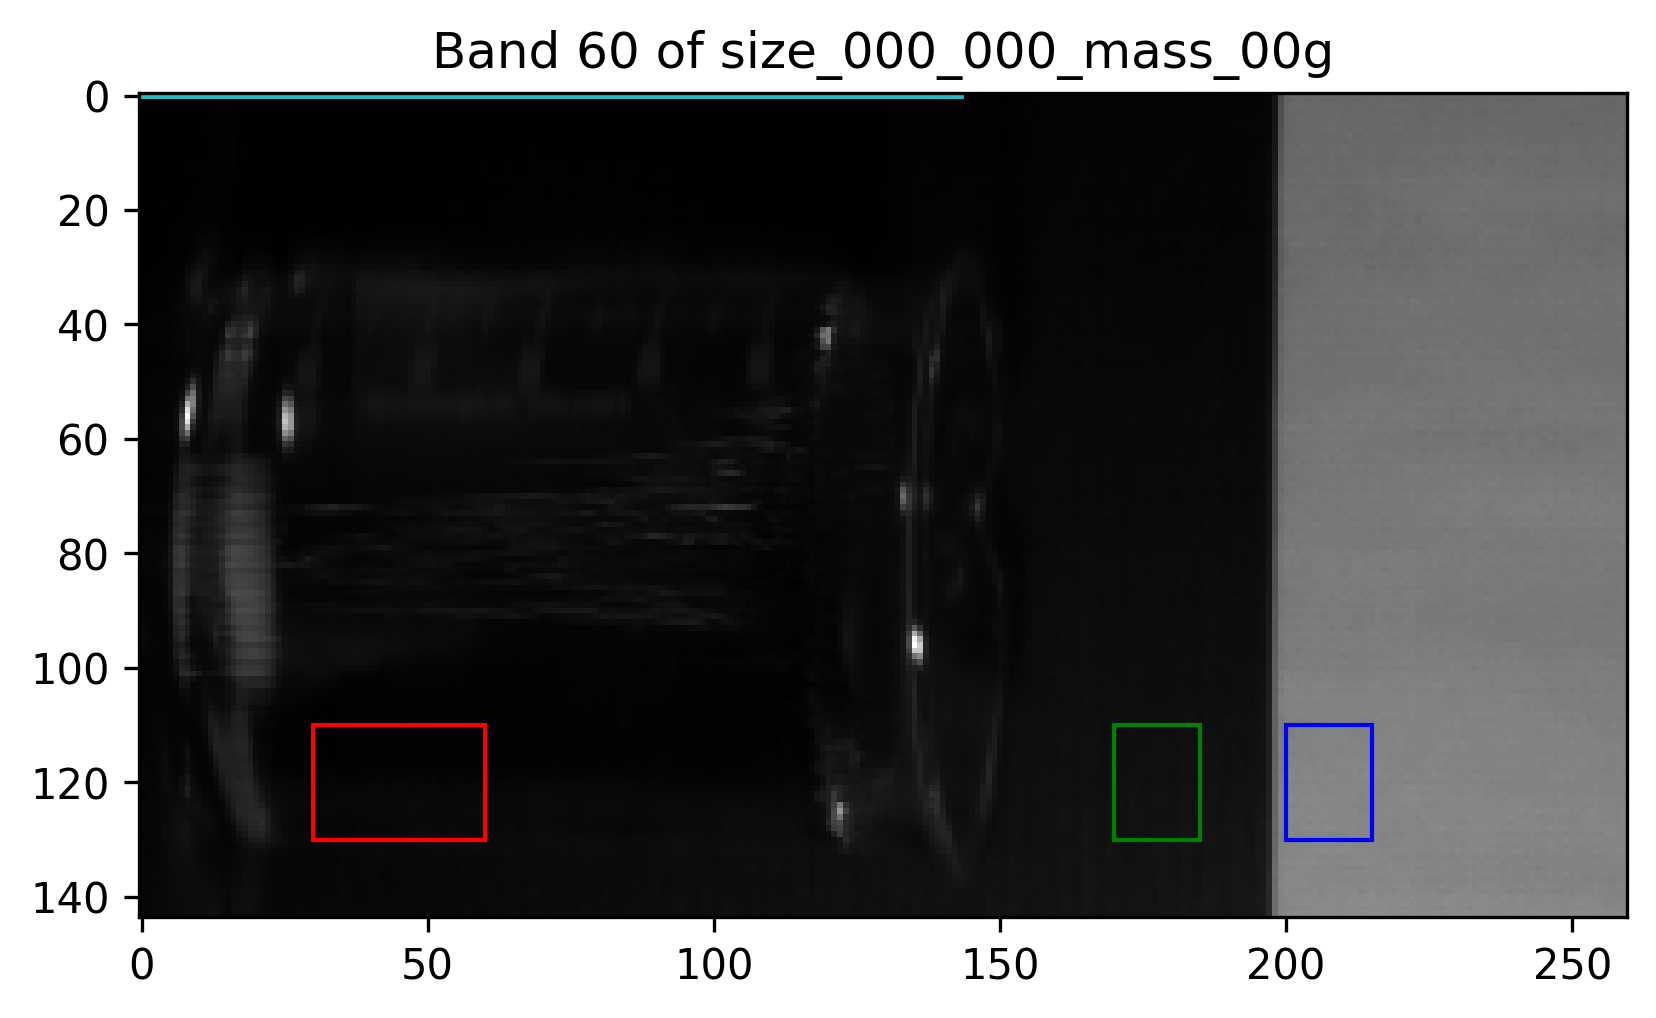

<Figure size 1920x1440 with 0 Axes>

57
57


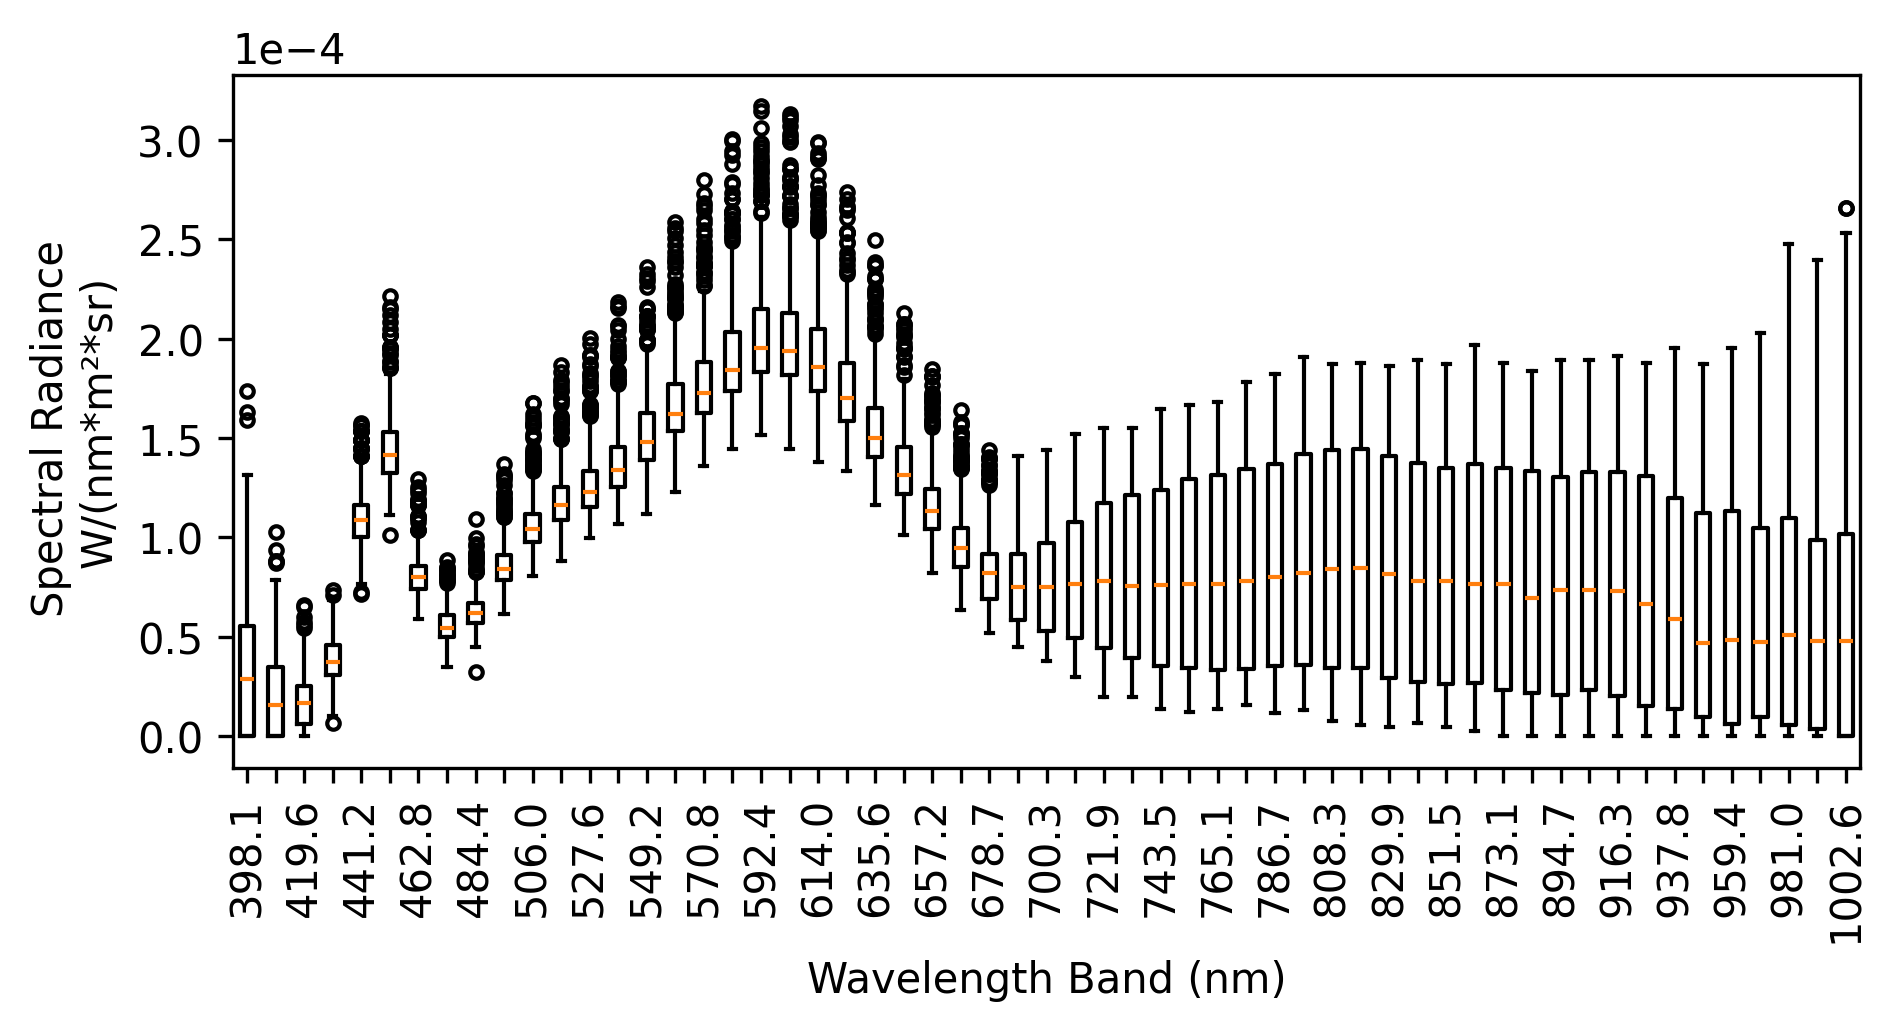

C:/Users/ADMIN//OneDrive - Rutgers University//HyperSpectral/DATA/2024-04-23-Sediment-Speed2-David\size_200_999_mass_00-5g_water_500mL_Baldur_V-1024N_SN10008_HSNR1_29900us_2024-04-23T201952_raw_rad_float32.hdr


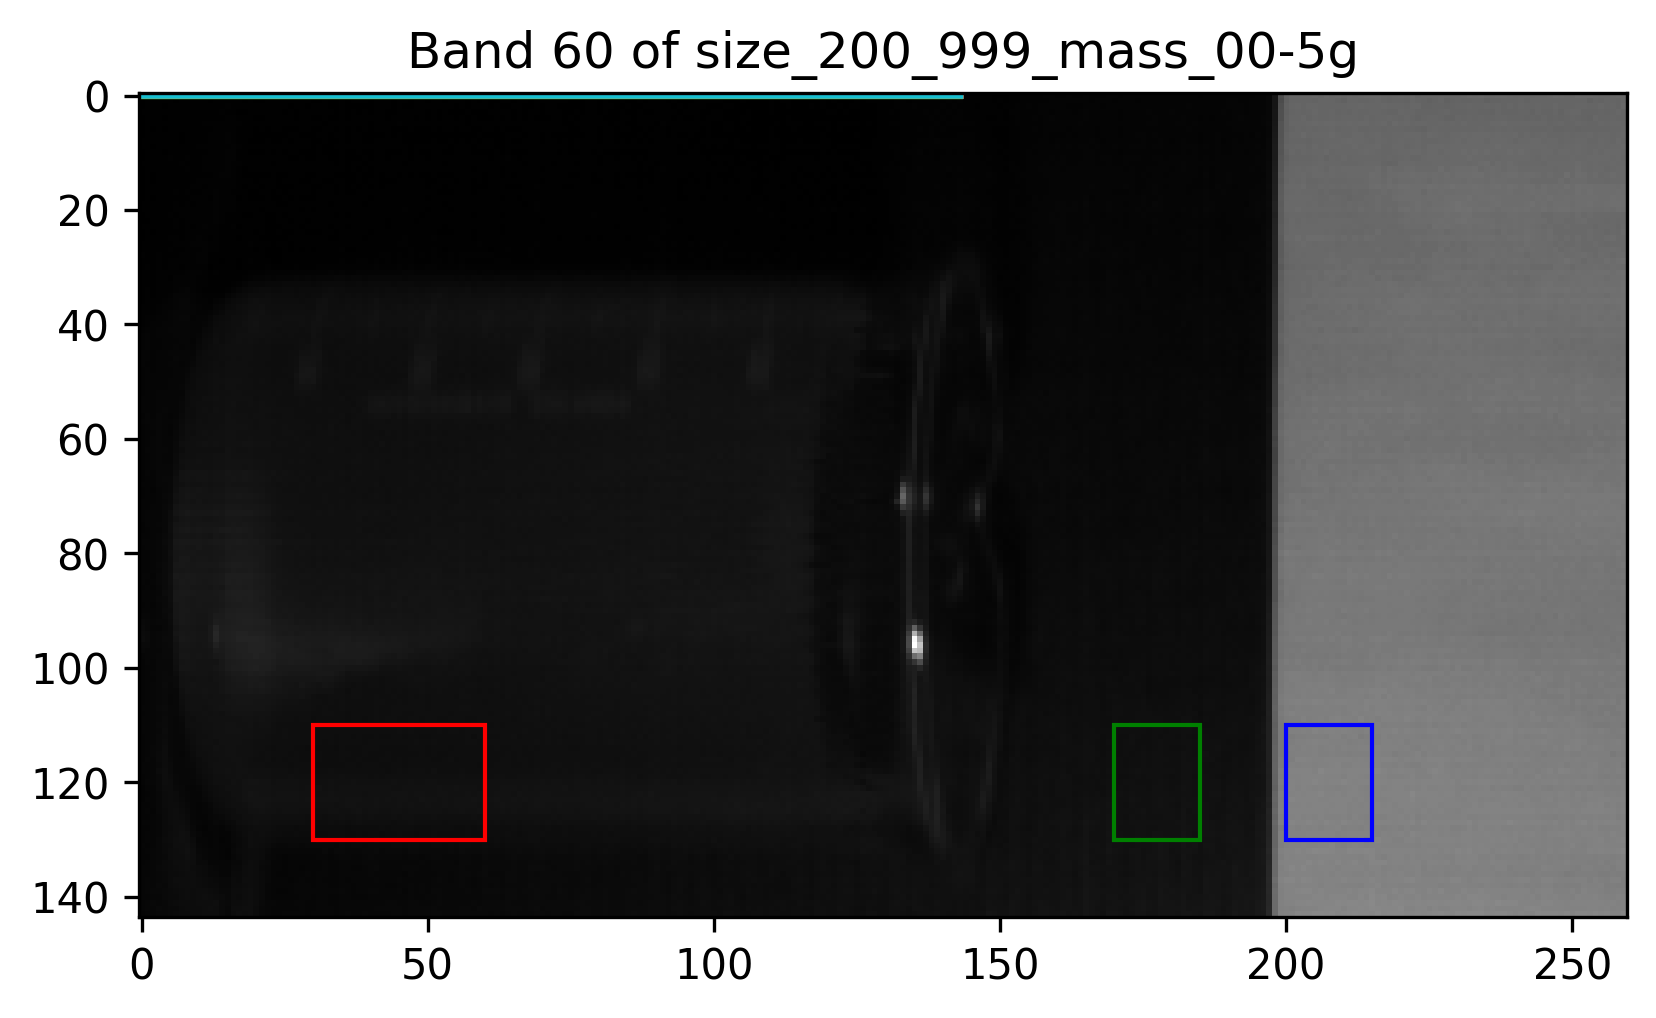

<Figure size 1920x1440 with 0 Axes>

57
57


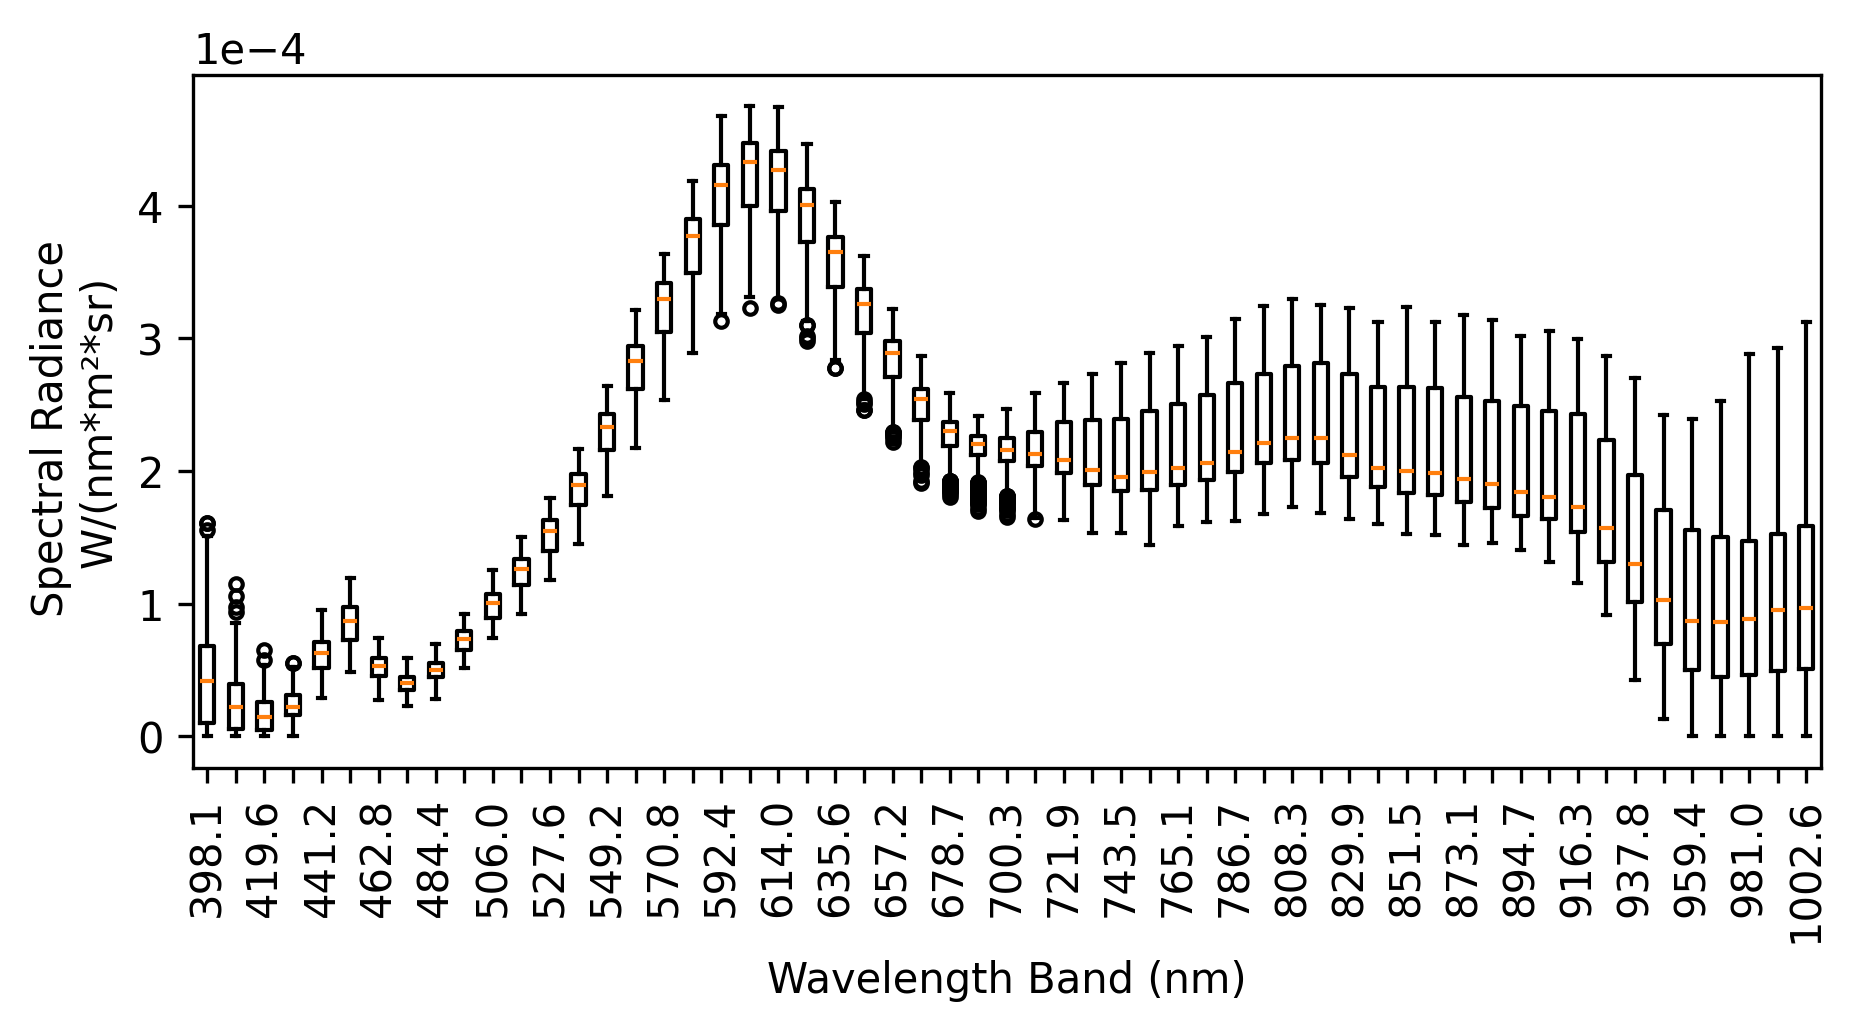

C:/Users/ADMIN//OneDrive - Rutgers University//HyperSpectral/DATA/2024-04-23-Sediment-Speed2-David\size_200_999_mass_00-5g_water_500mL_Baldur_V-1024N_SN10008_HSNR1_29900us_2024-04-23T202127_raw_rad_float32.hdr


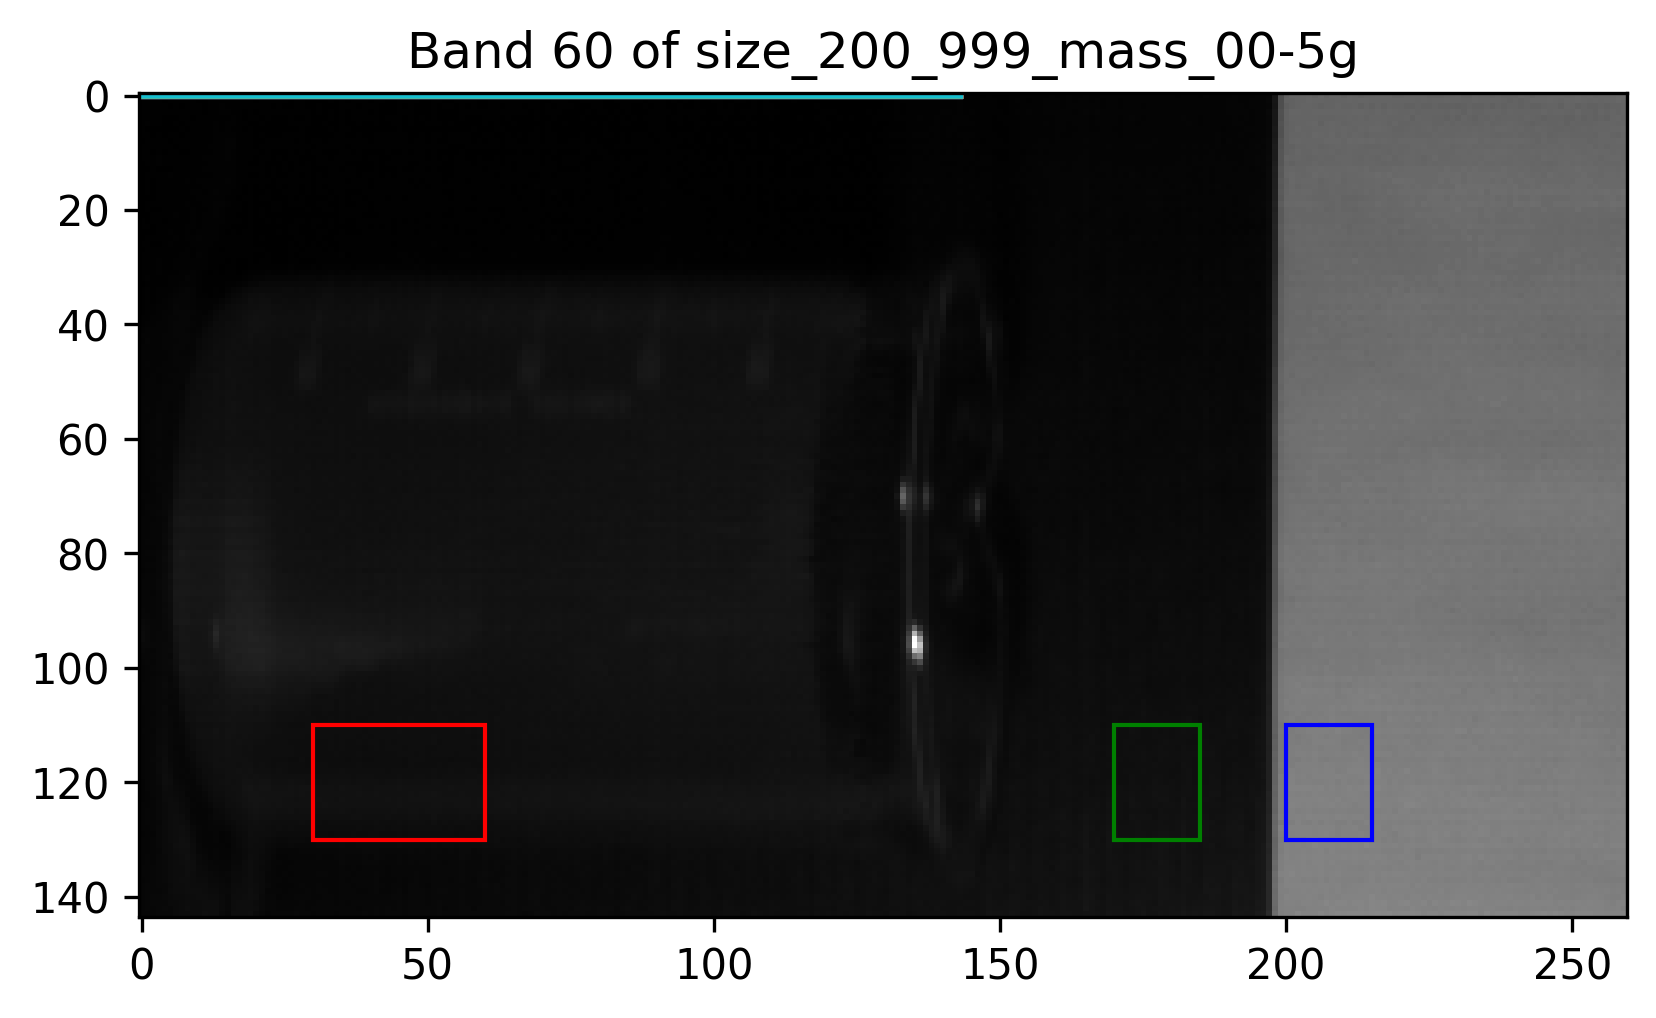

<Figure size 1920x1440 with 0 Axes>

57
57


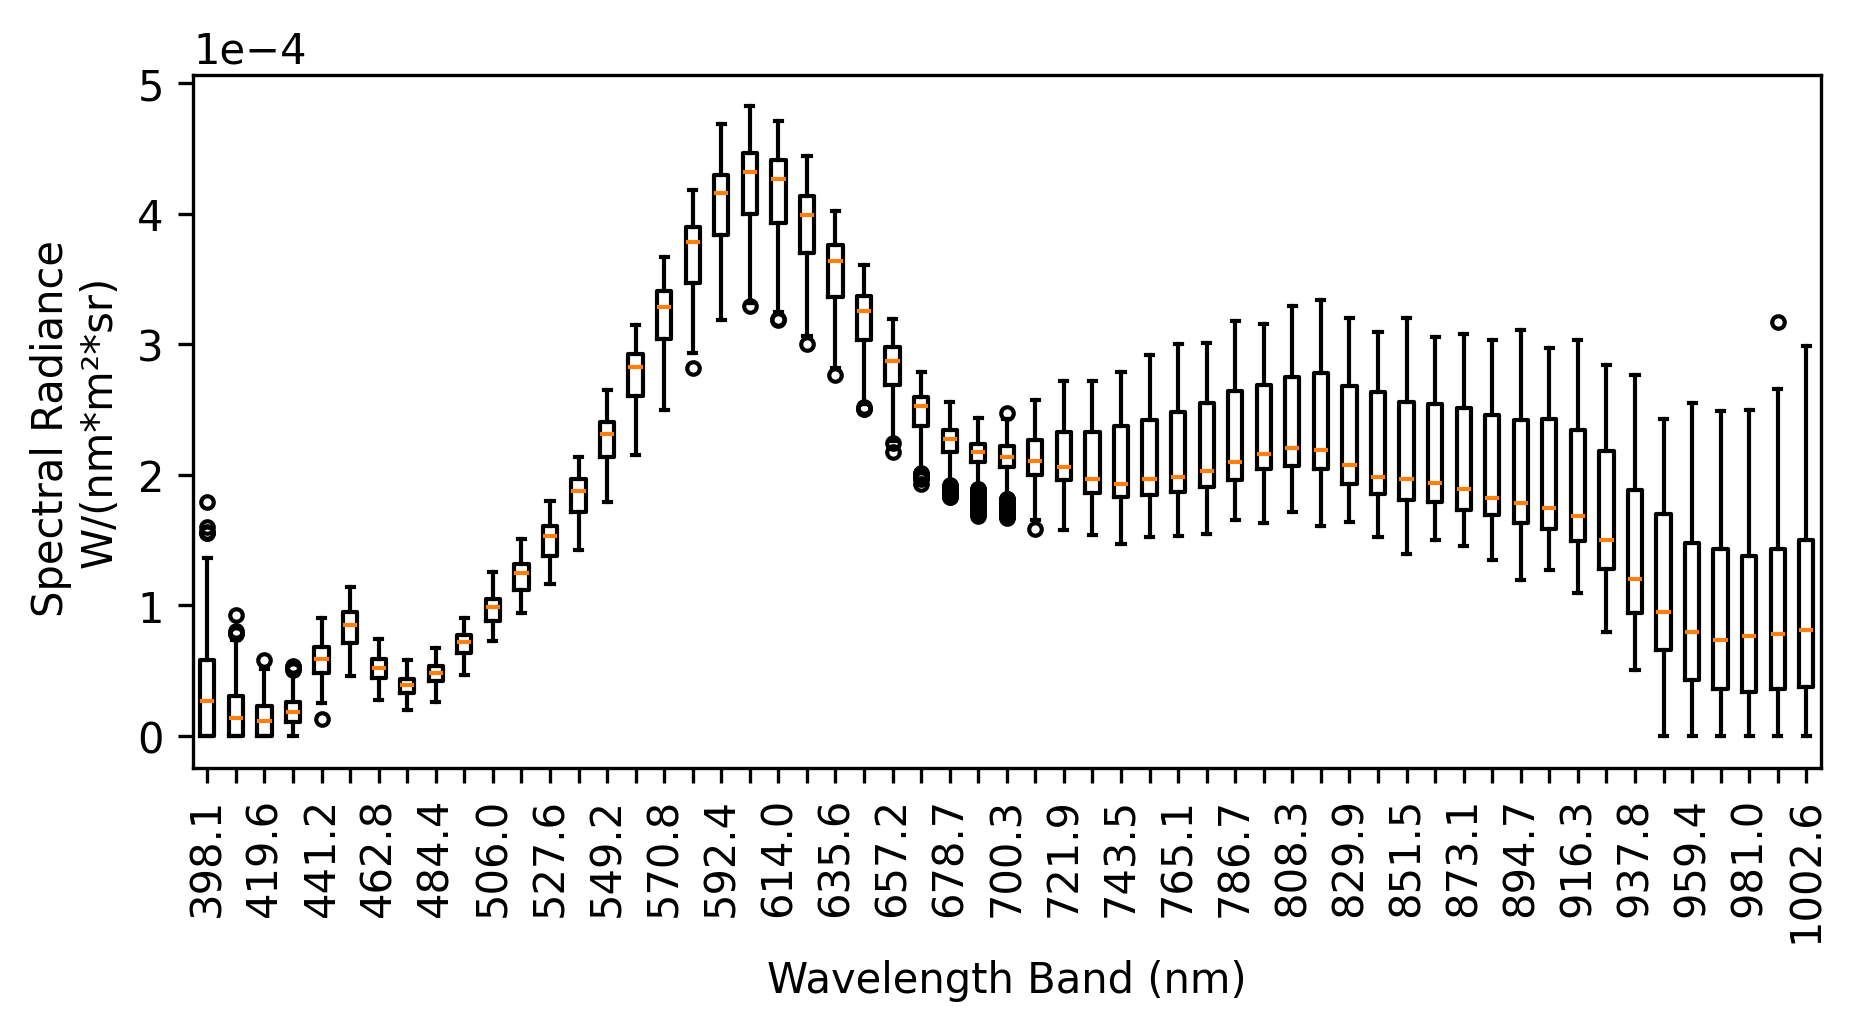

C:/Users/ADMIN//OneDrive - Rutgers University//HyperSpectral/DATA/2024-04-23-Sediment-Speed2-David\size_200_999_mass_01-0g_water_500mL_Baldur_V-1024N_SN10008_HSNR1_29900us_2024-04-23T202319_raw_rad_float32.hdr


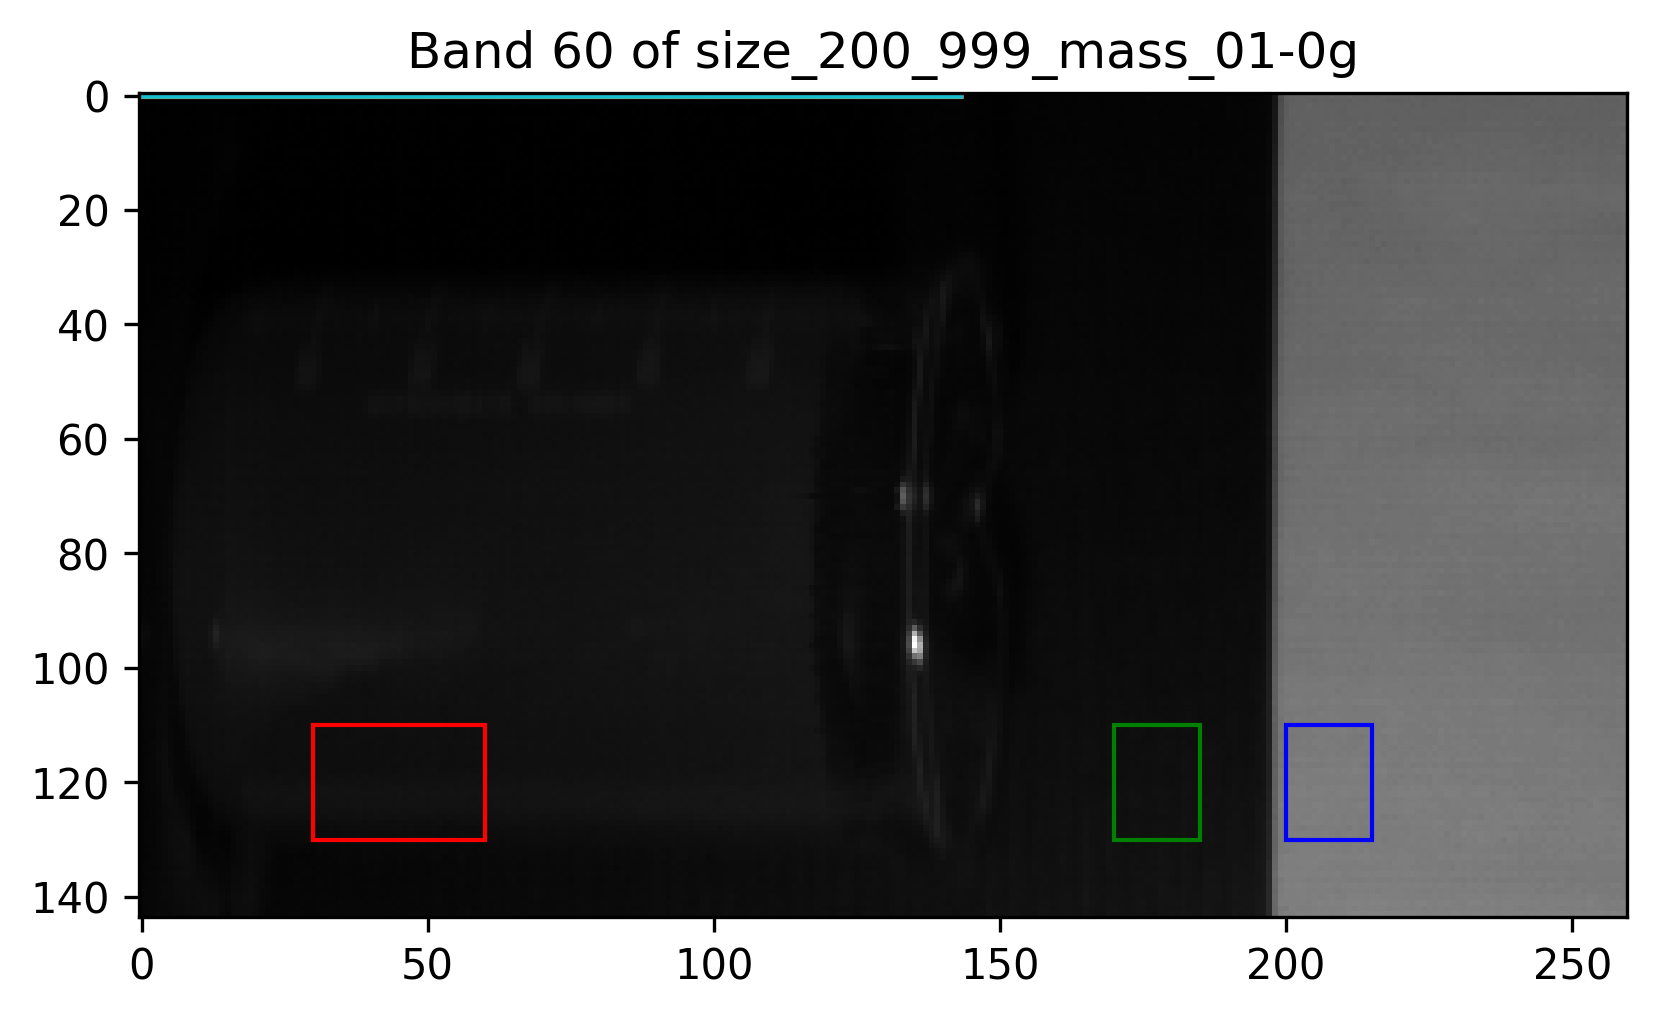

<Figure size 1920x1440 with 0 Axes>

57
57


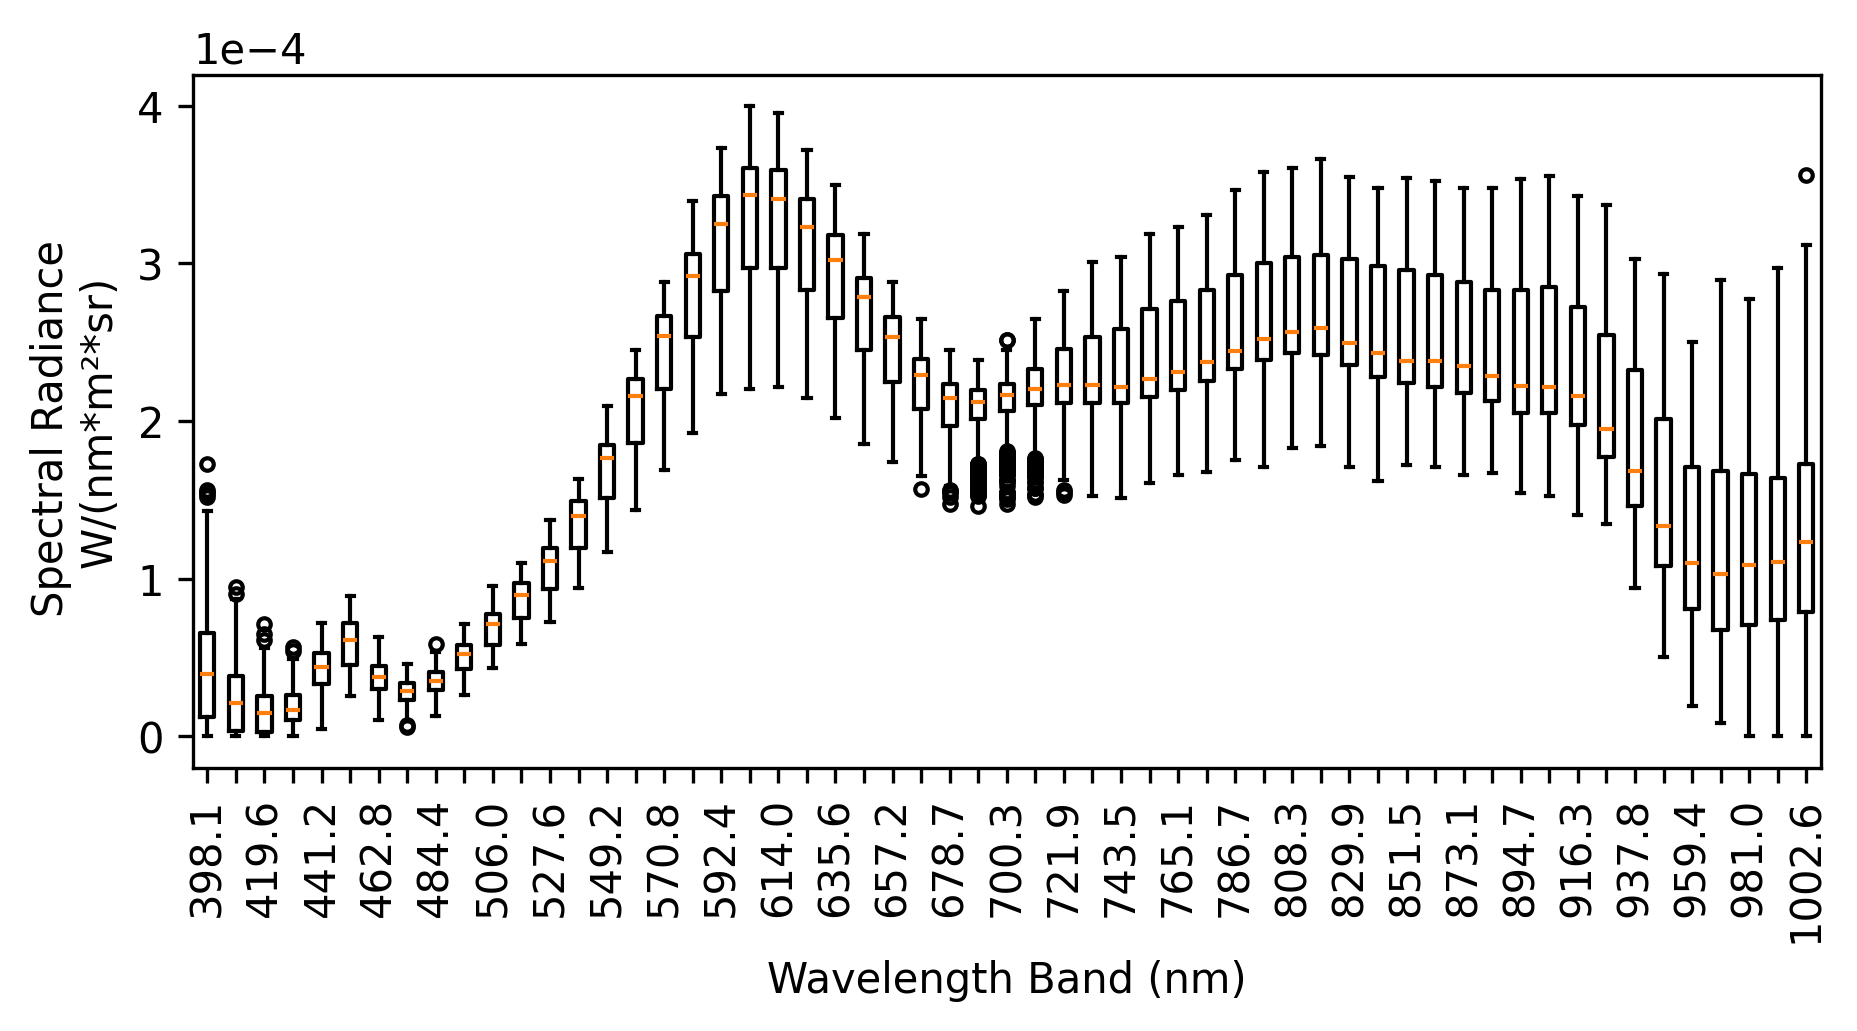

C:/Users/ADMIN//OneDrive - Rutgers University//HyperSpectral/DATA/2024-04-23-Sediment-Speed2-David\size_200_999_mass_01-0g_water_500mL_Baldur_V-1024N_SN10008_HSNR1_29900us_2024-04-23T202412_raw_rad_float32.hdr


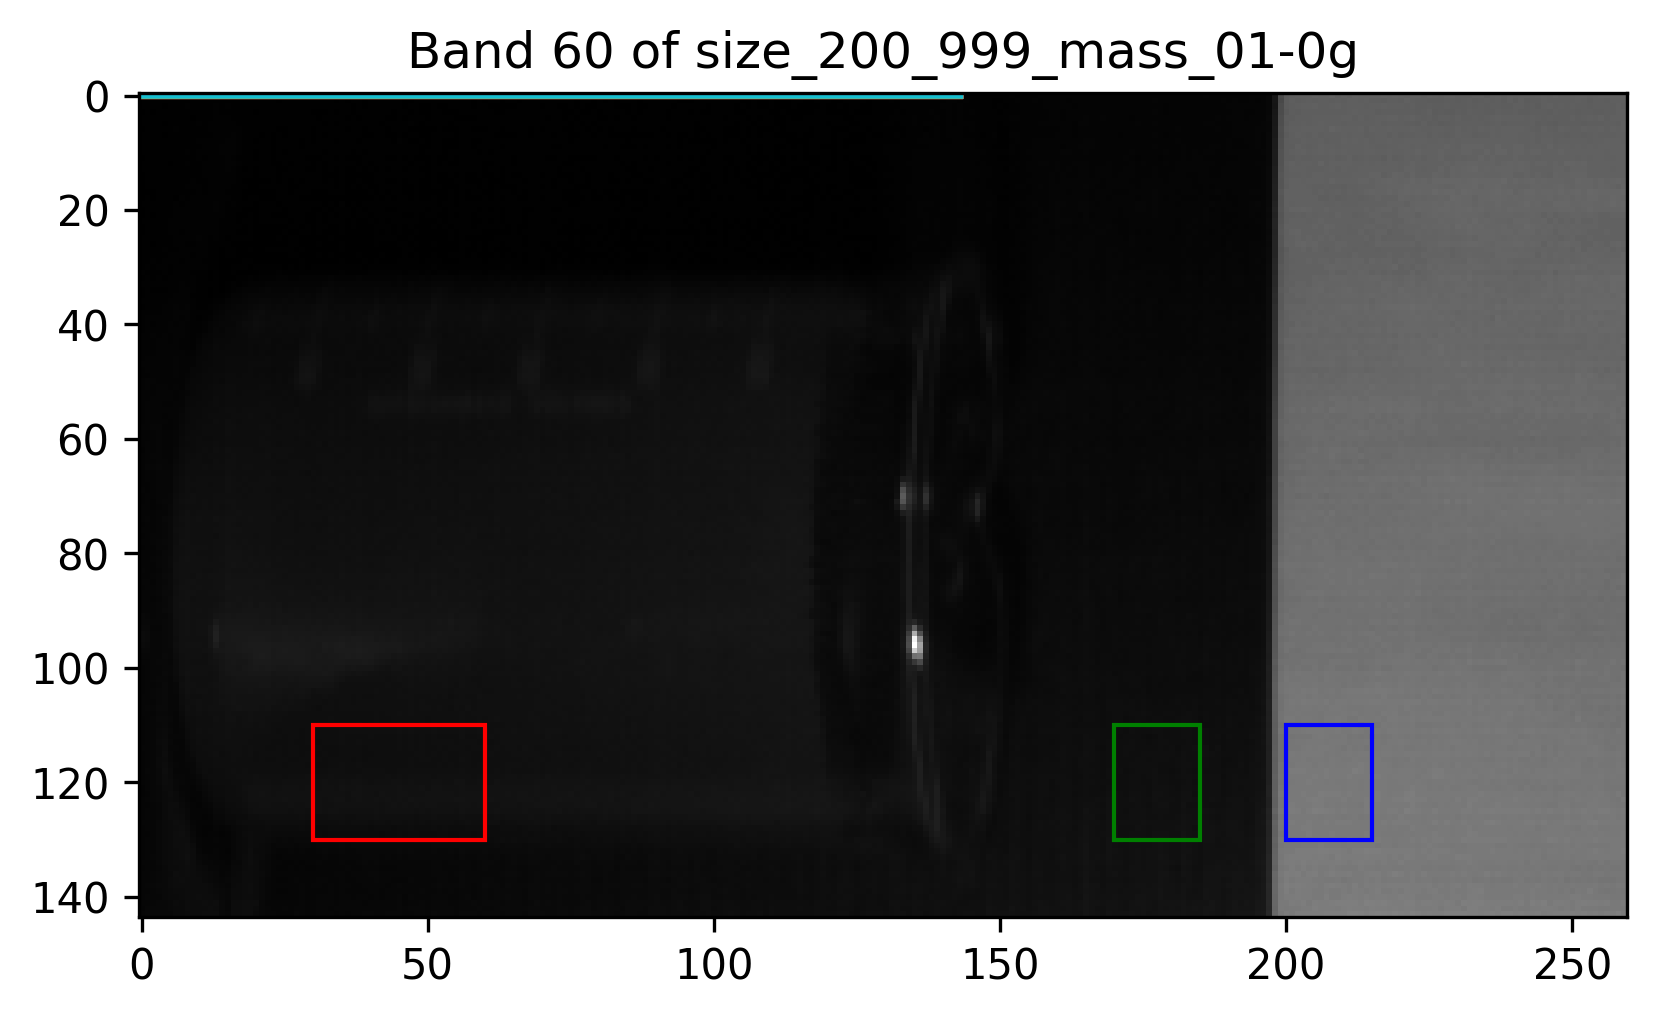

<Figure size 1920x1440 with 0 Axes>

57
57


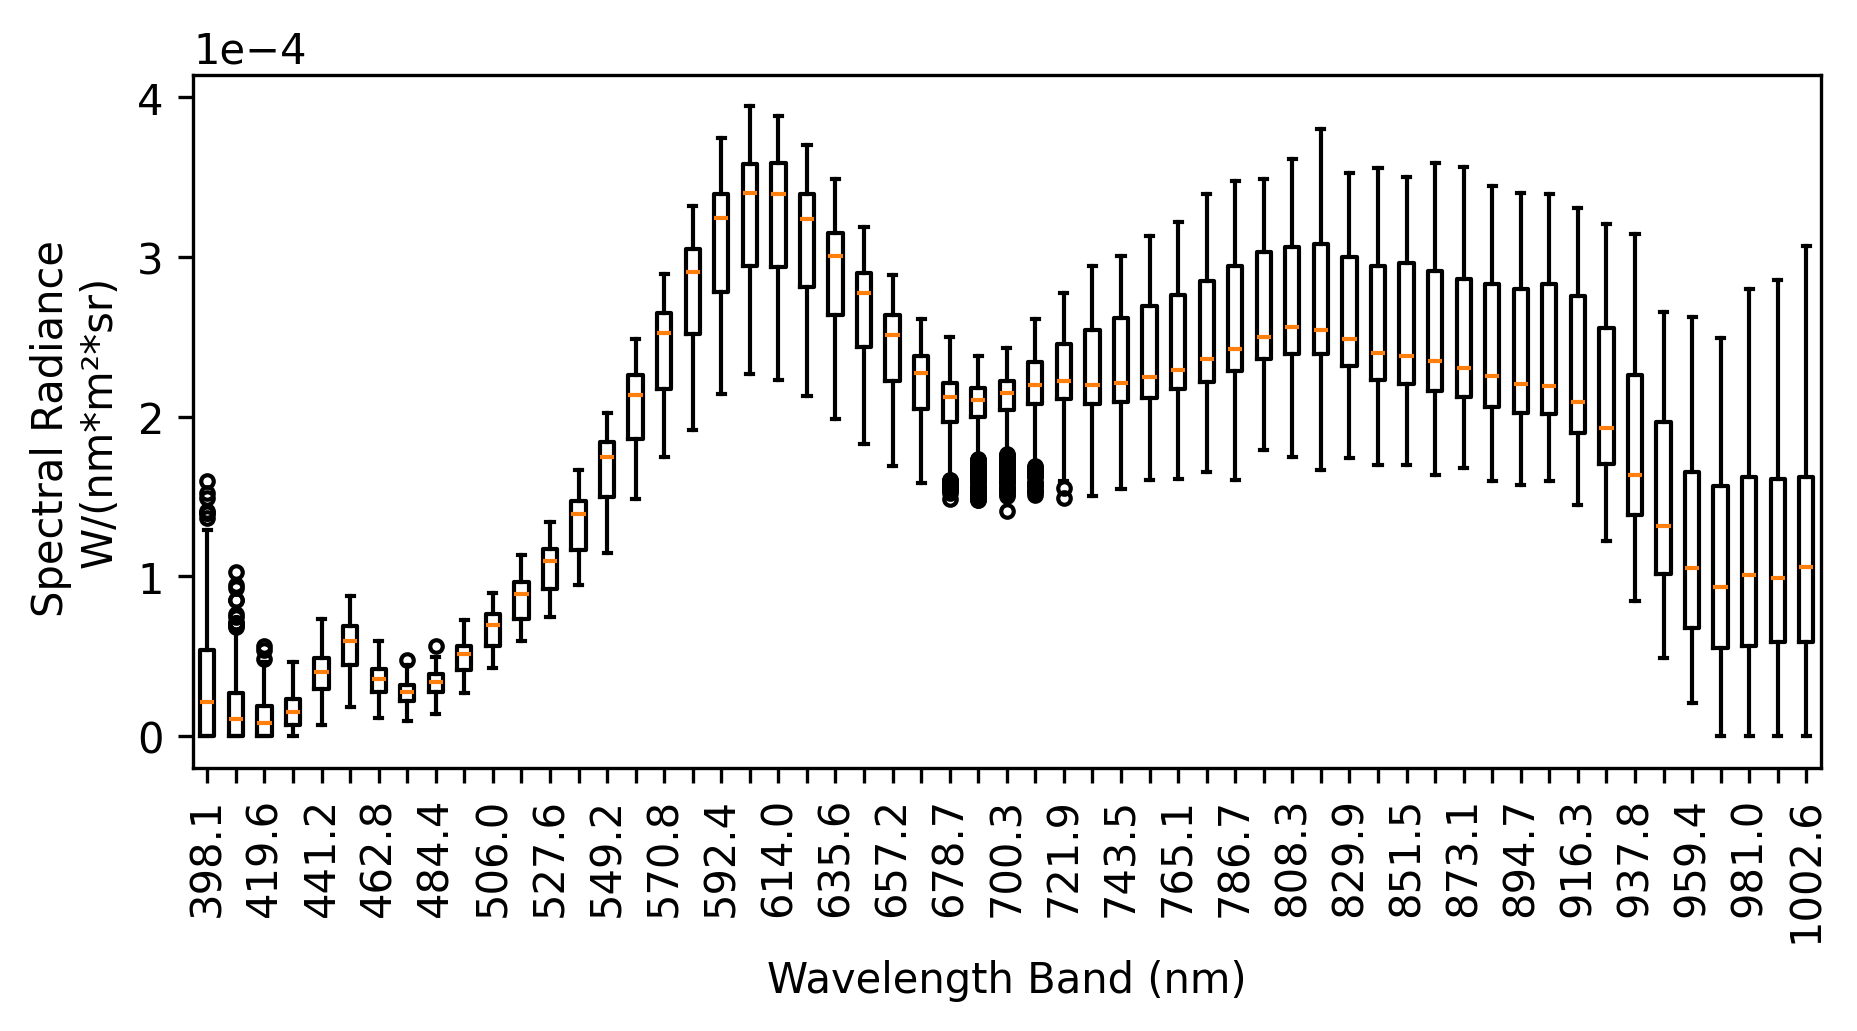

C:/Users/ADMIN//OneDrive - Rutgers University//HyperSpectral/DATA/2024-04-23-Sediment-Speed2-David\size_200_999_mass_02-0g_water_500mL_Baldur_V-1024N_SN10008_HSNR1_29900us_2024-04-23T202642_raw_rad_float32.hdr


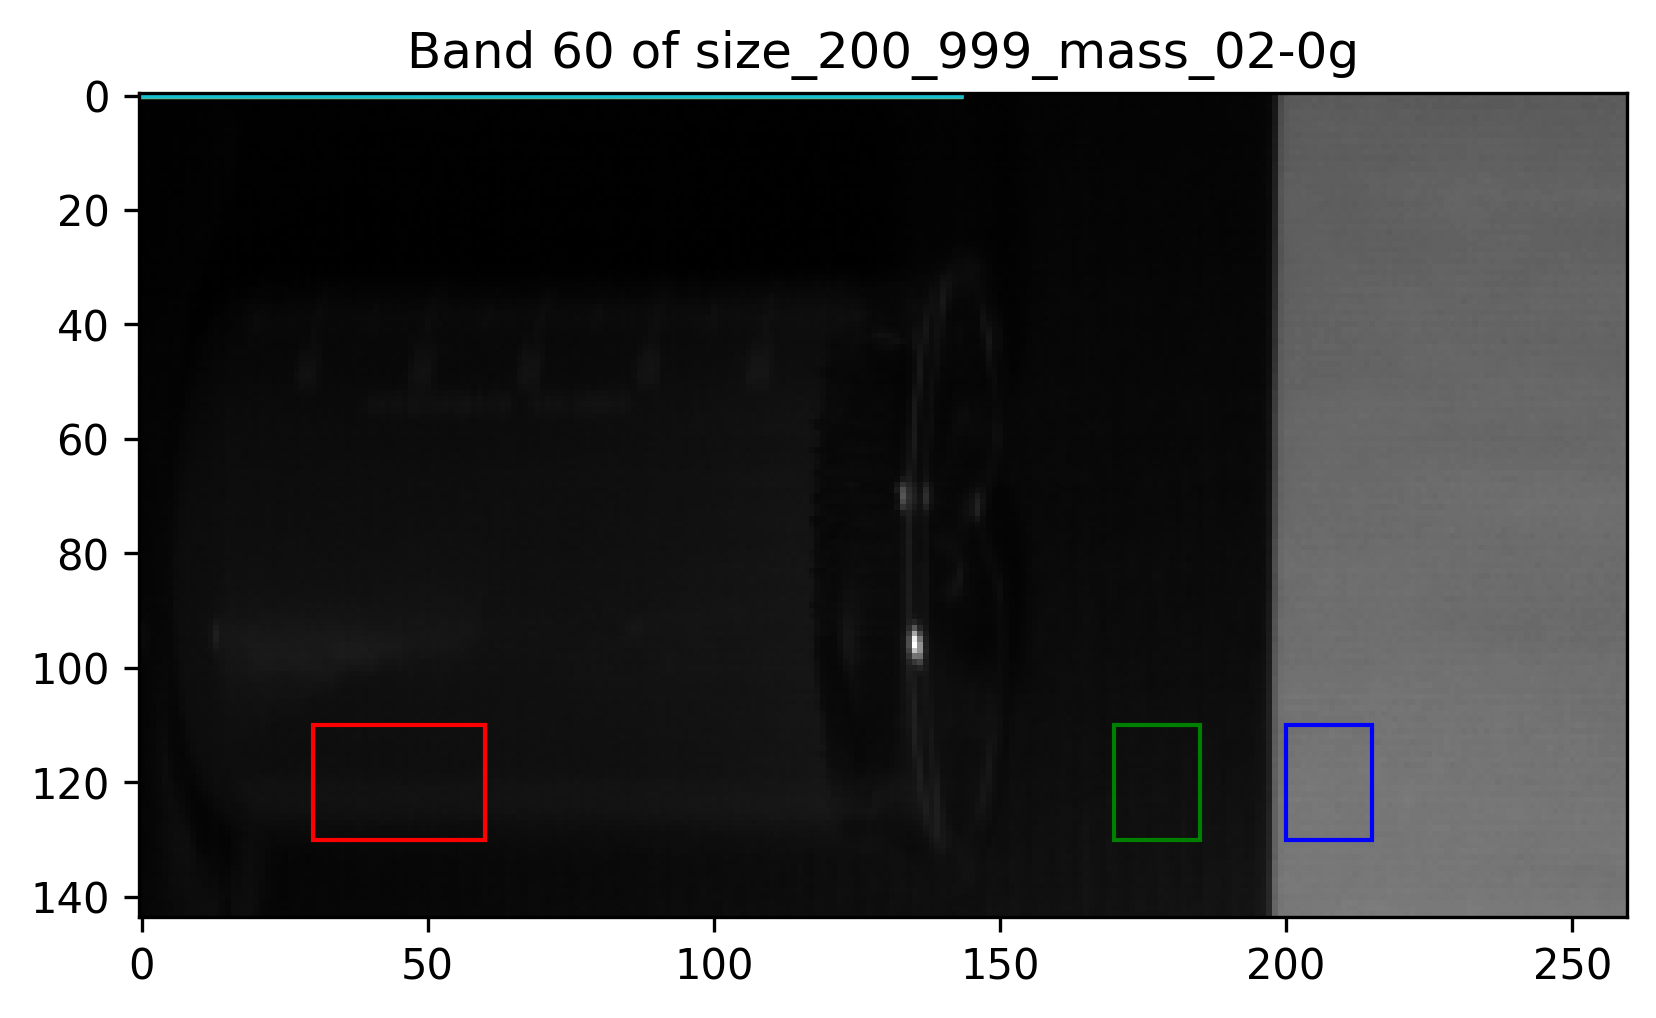

<Figure size 1920x1440 with 0 Axes>

57
57


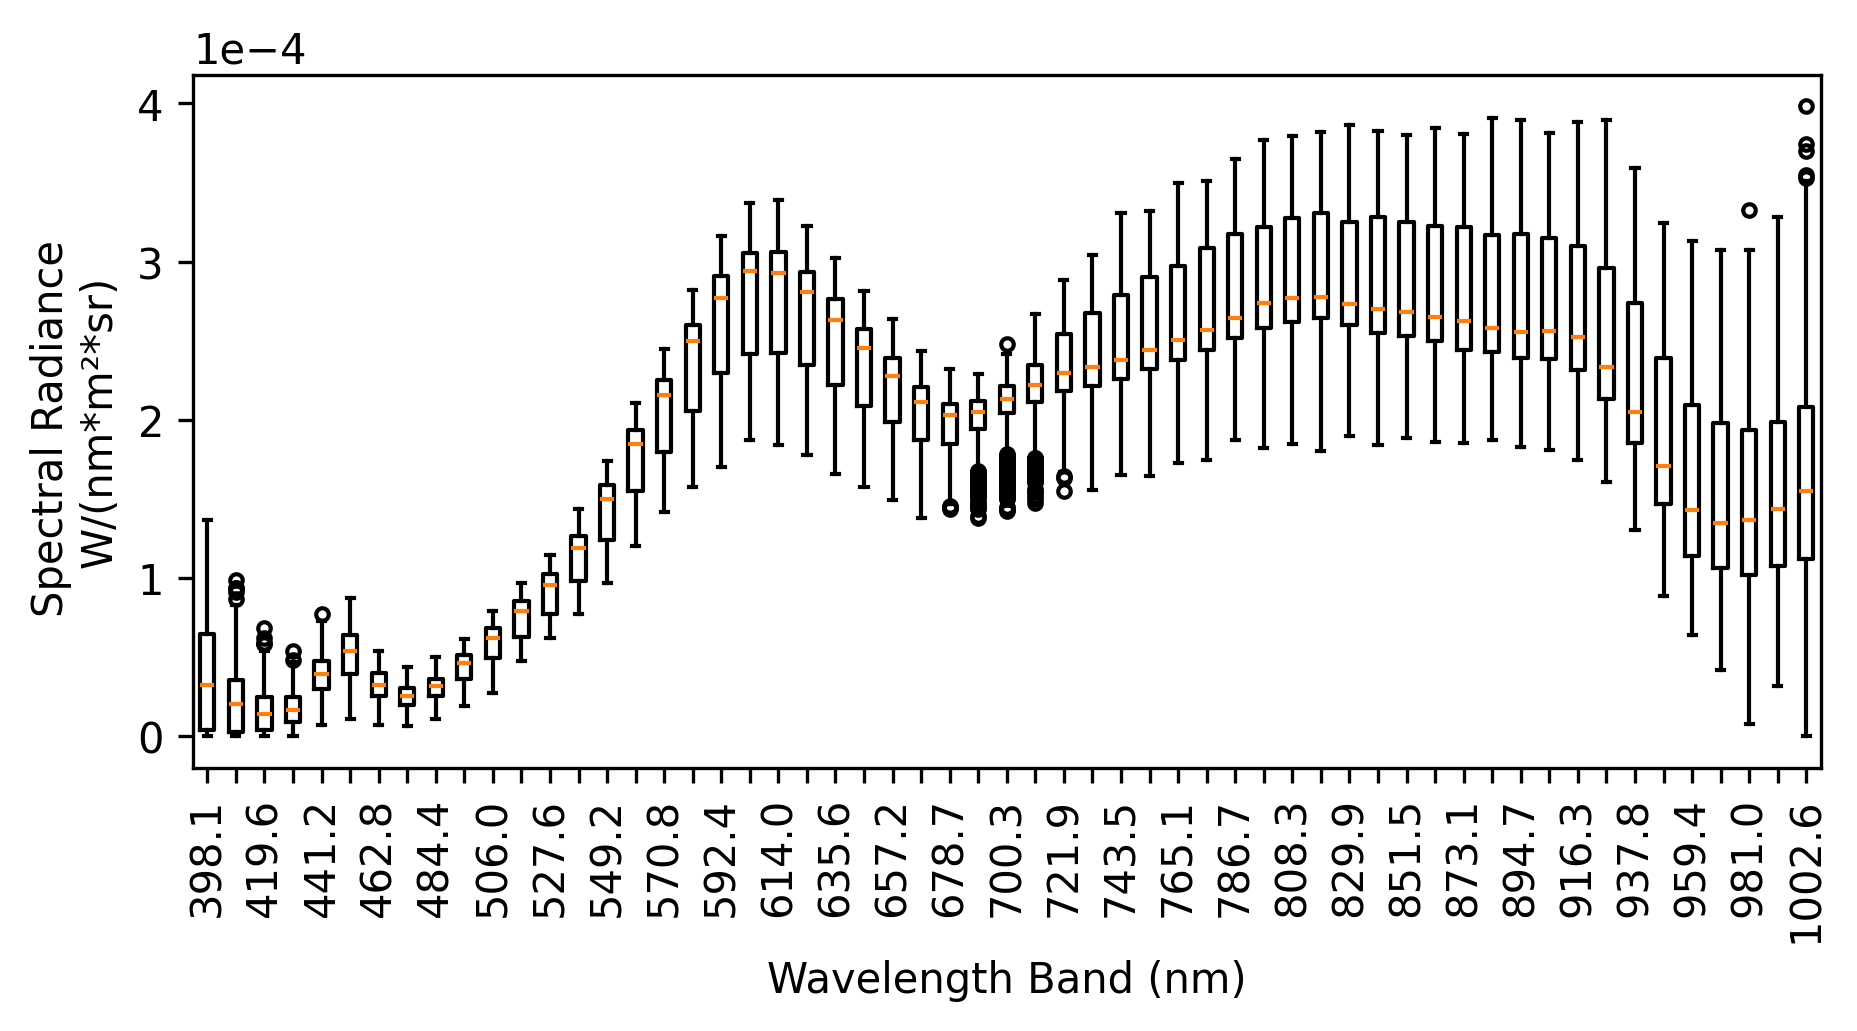

C:/Users/ADMIN//OneDrive - Rutgers University//HyperSpectral/DATA/2024-04-23-Sediment-Speed2-David\size_200_999_mass_02-0g_water_500mL_Baldur_V-1024N_SN10008_HSNR1_29900us_2024-04-23T202757_raw_rad_float32.hdr


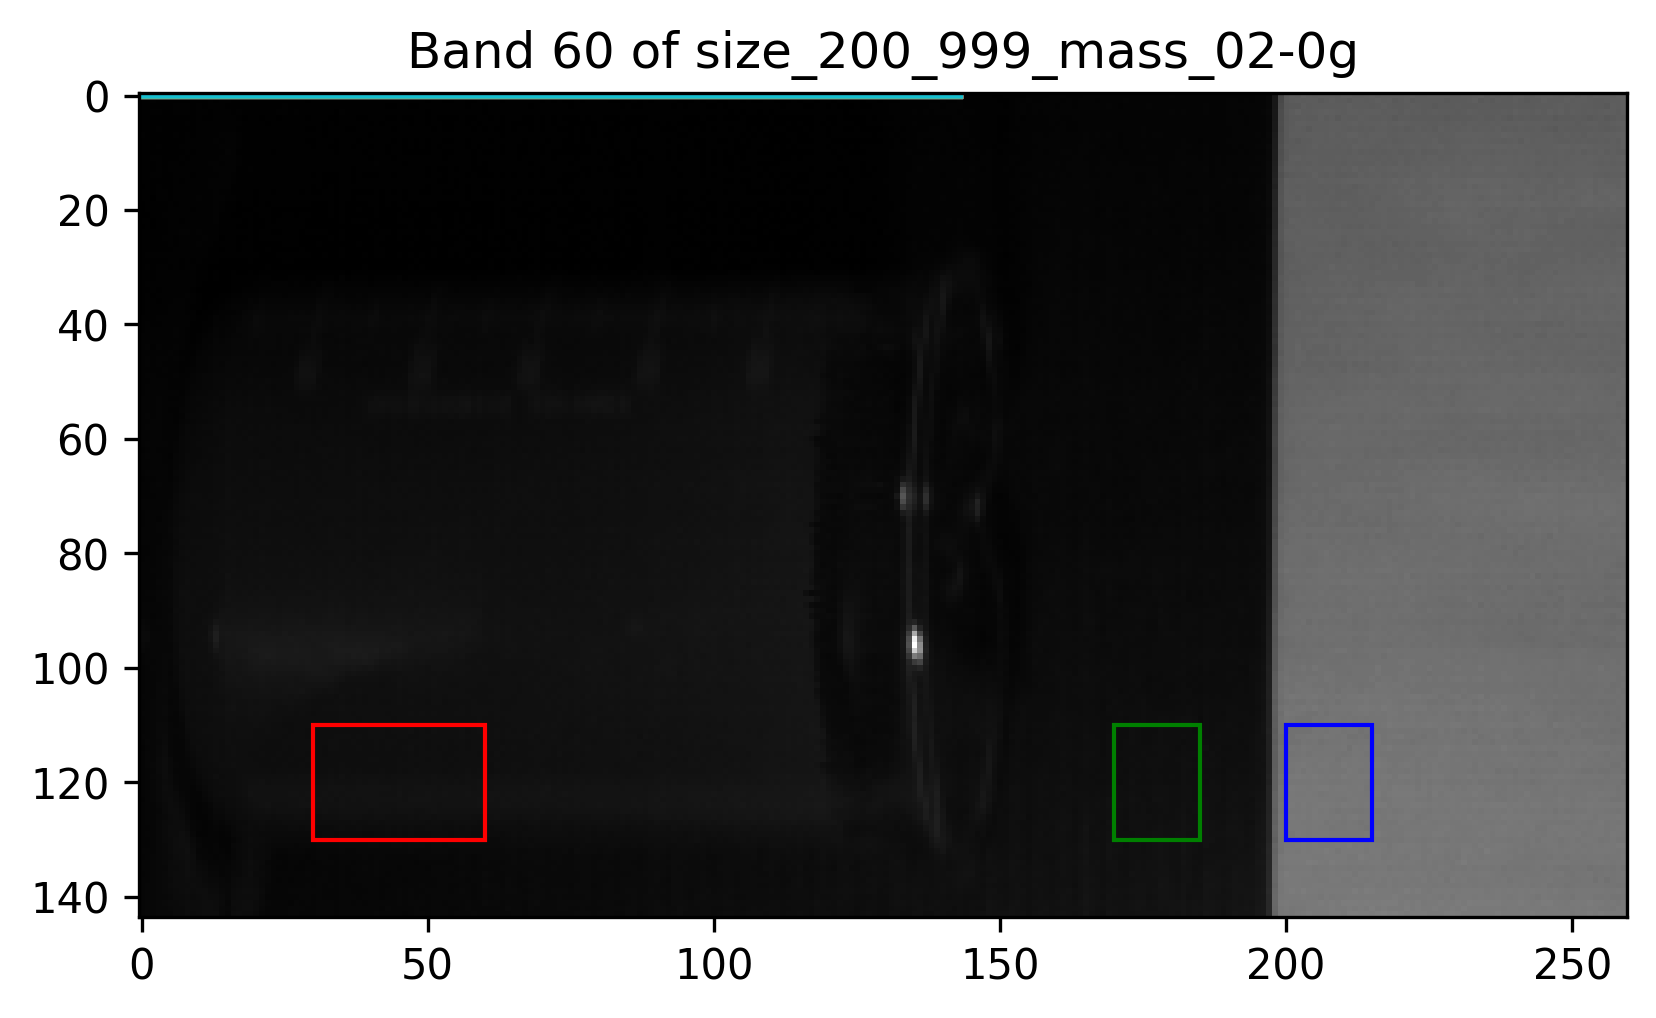

<Figure size 1920x1440 with 0 Axes>

57
57


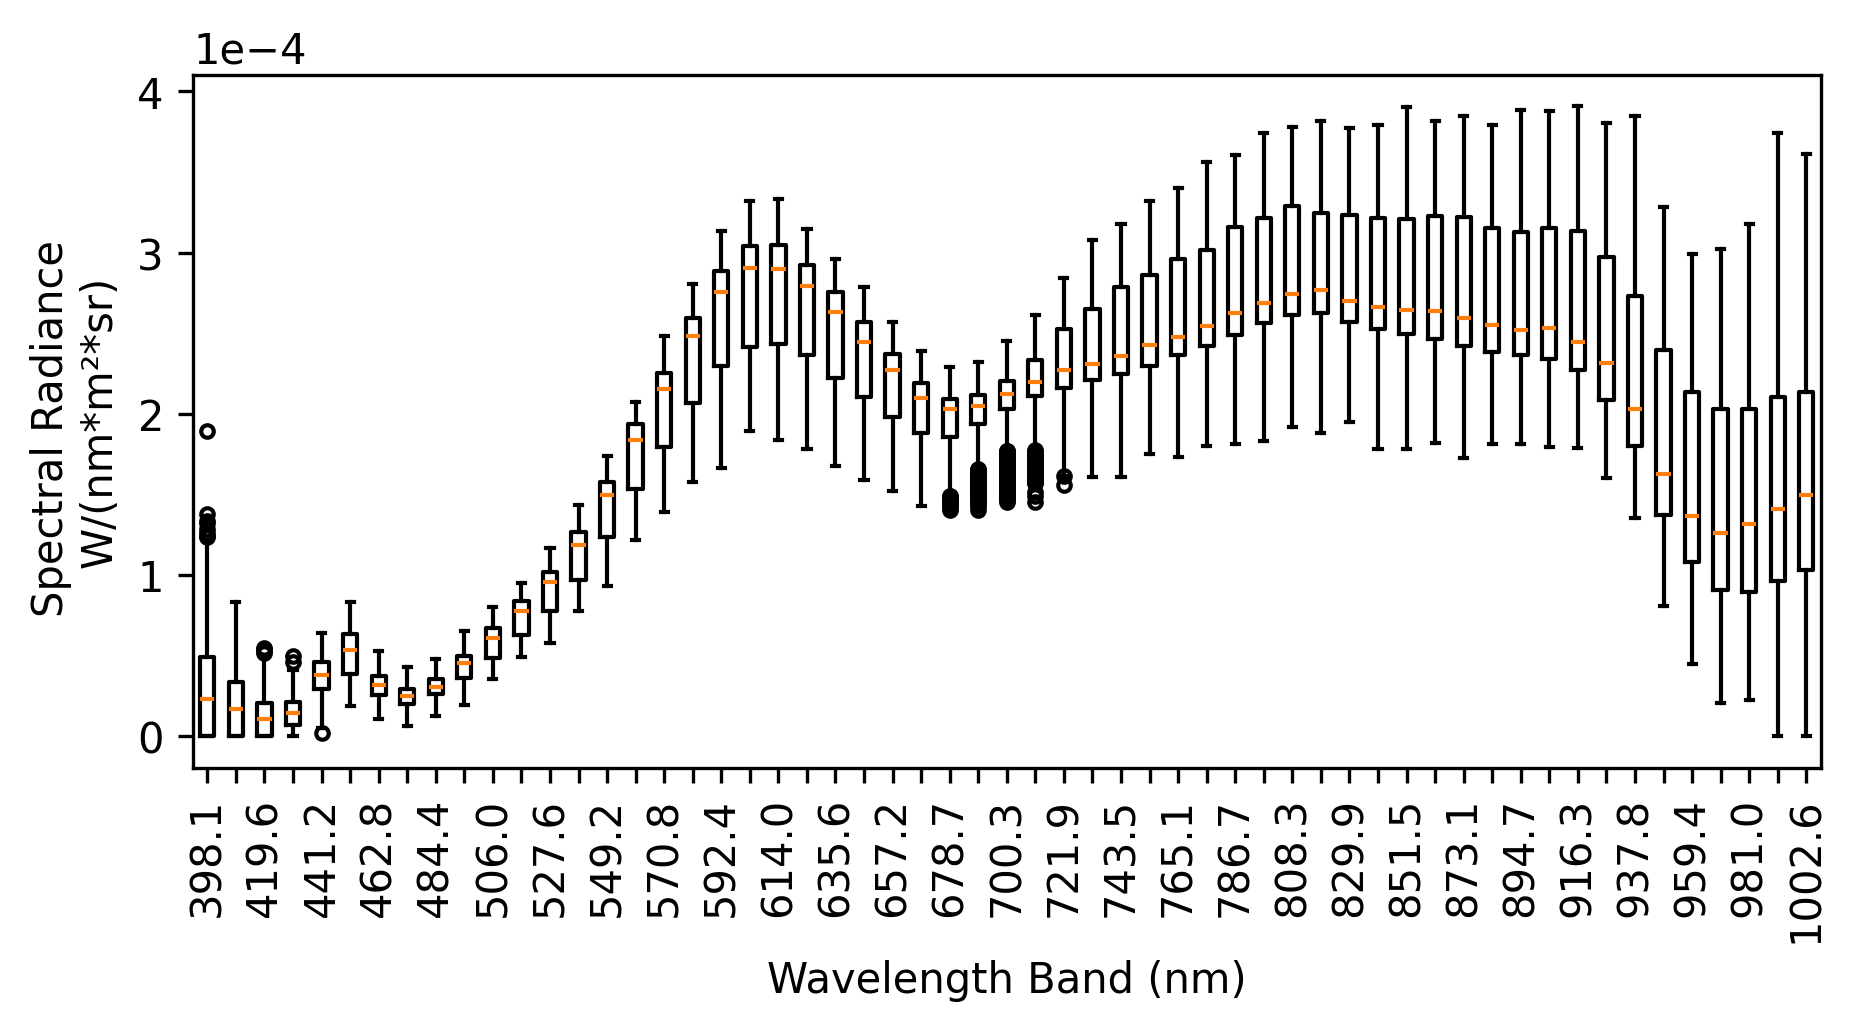

C:/Users/ADMIN//OneDrive - Rutgers University//HyperSpectral/DATA/2024-04-23-Sediment-Speed2-David\size_200_999_mass_03-0g_water_500mL_Baldur_V-1024N_SN10008_HSNR1_29900us_2024-04-23T202944_raw_rad_float32.hdr


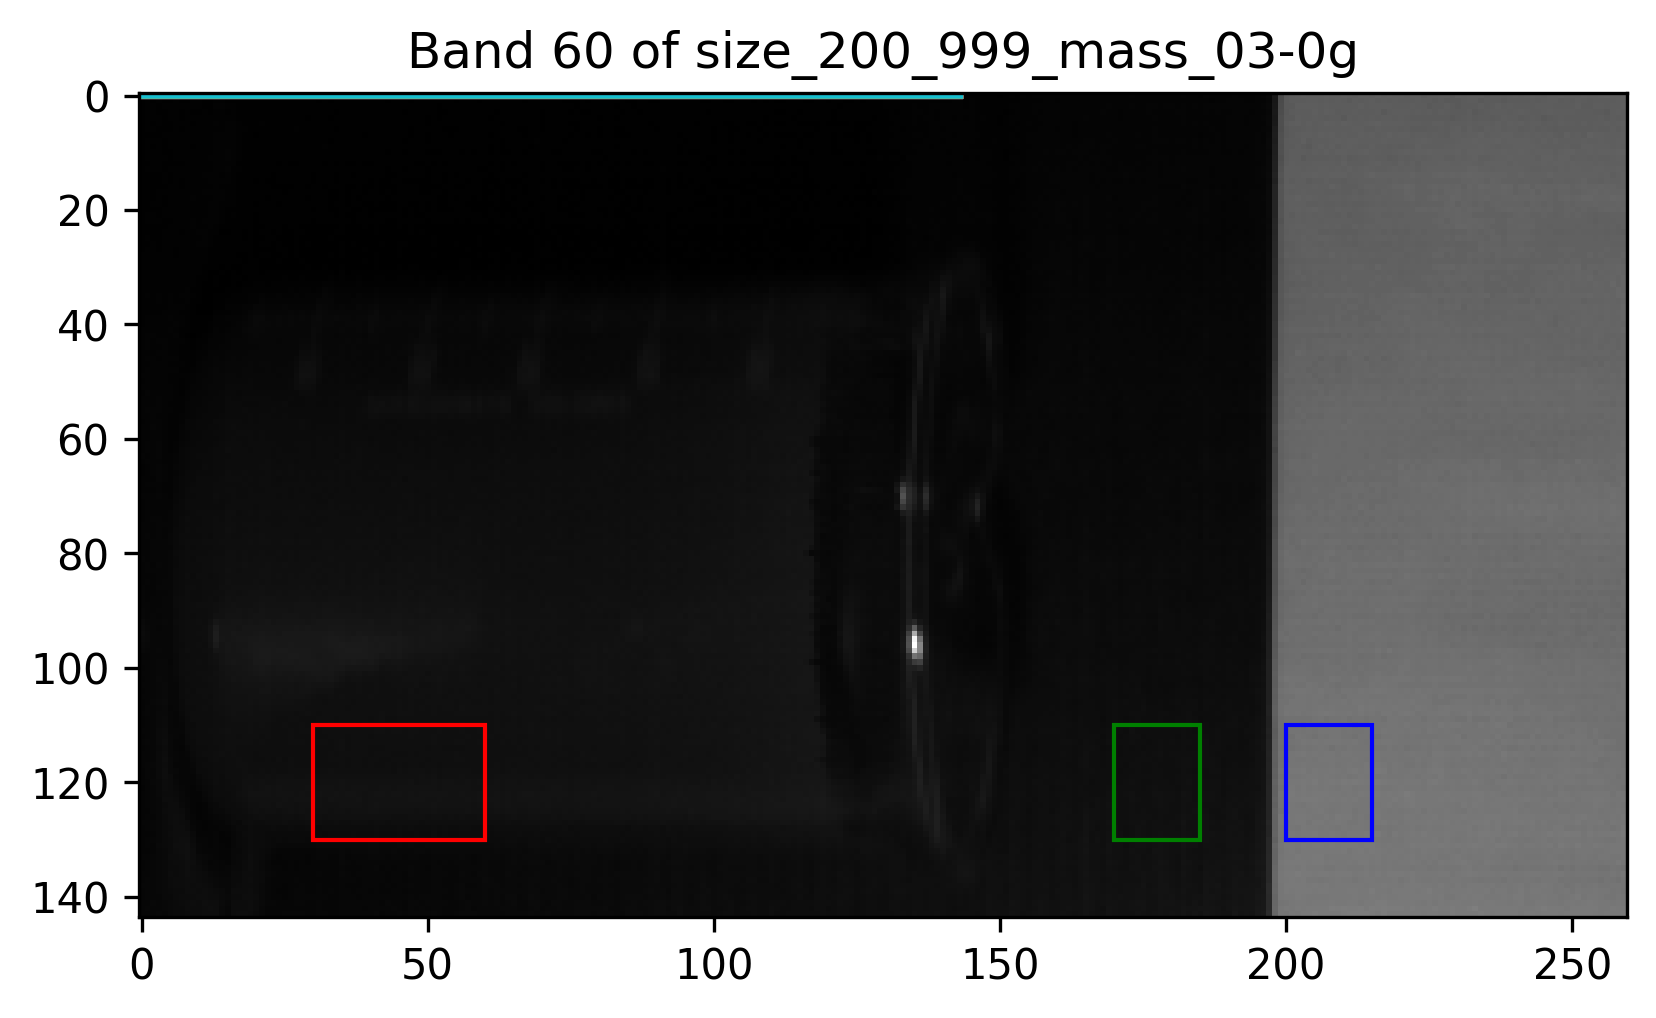

<Figure size 1920x1440 with 0 Axes>

57
57


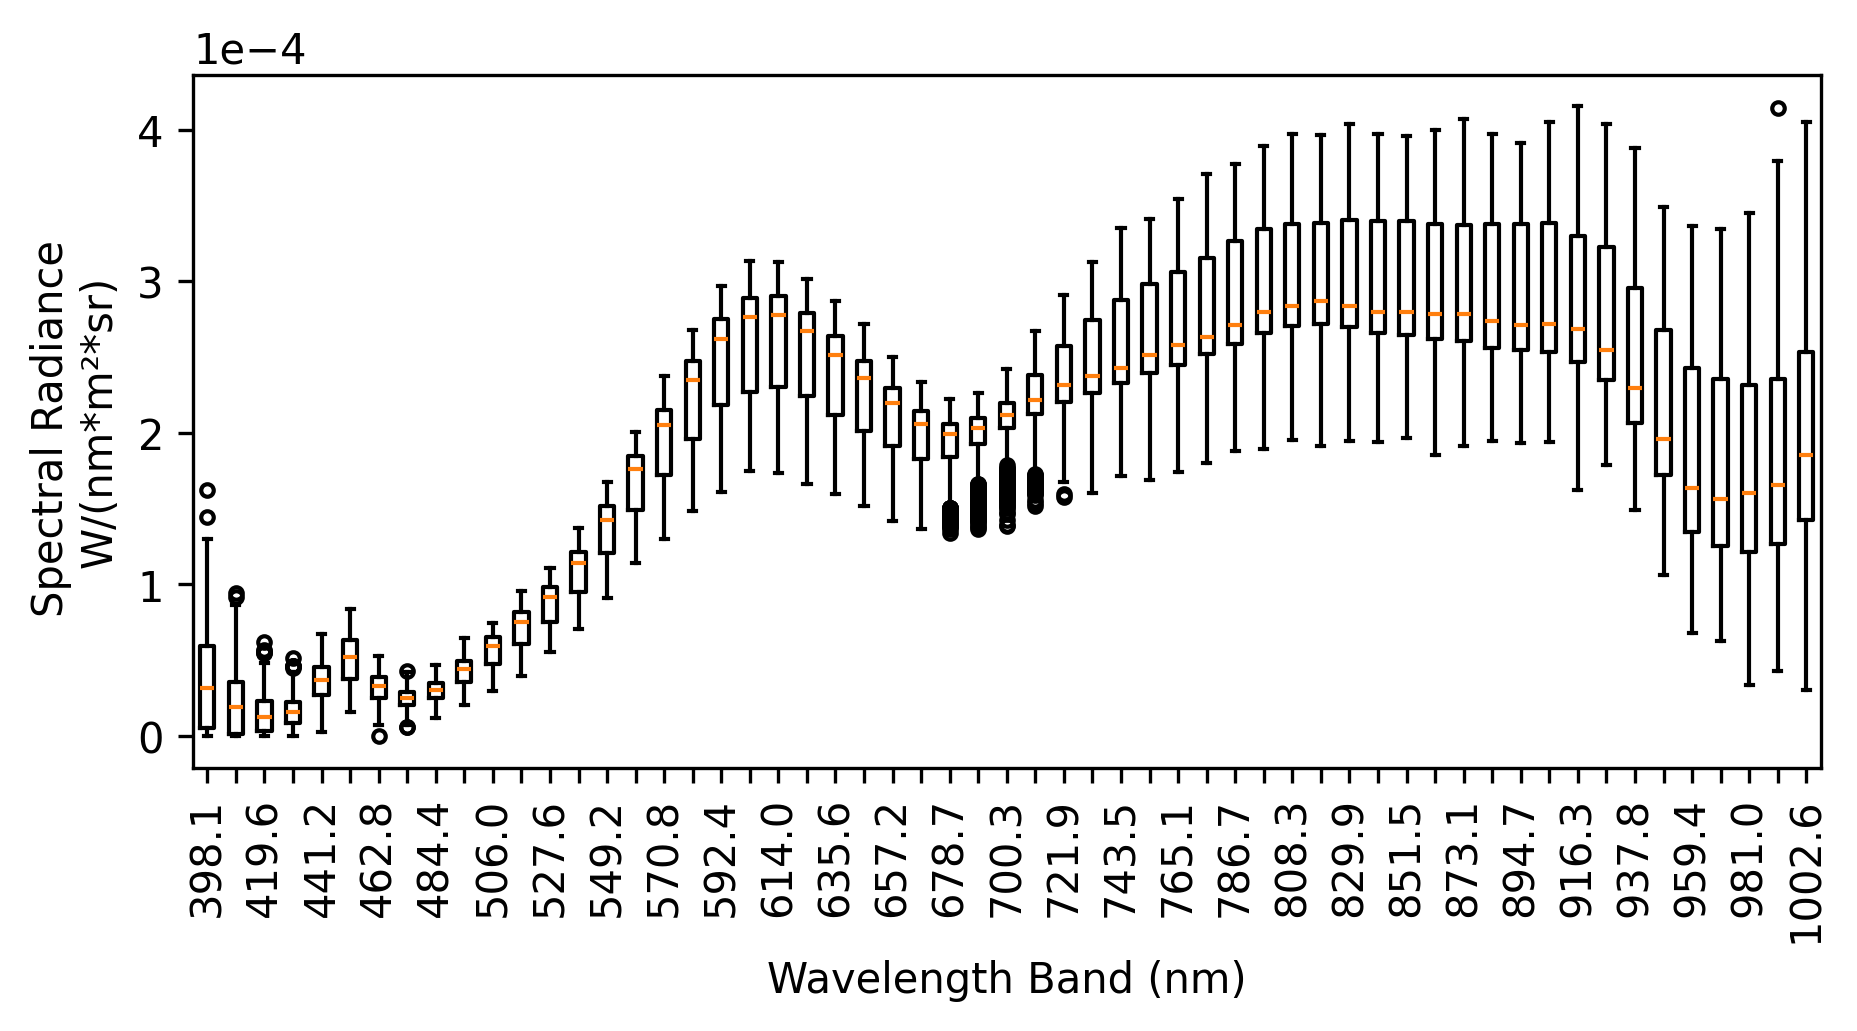

C:/Users/ADMIN//OneDrive - Rutgers University//HyperSpectral/DATA/2024-04-23-Sediment-Speed2-David\size_200_999_mass_03-0g_water_500mL_Baldur_V-1024N_SN10008_HSNR1_29900us_2024-04-23T203032_raw_rad_float32.hdr


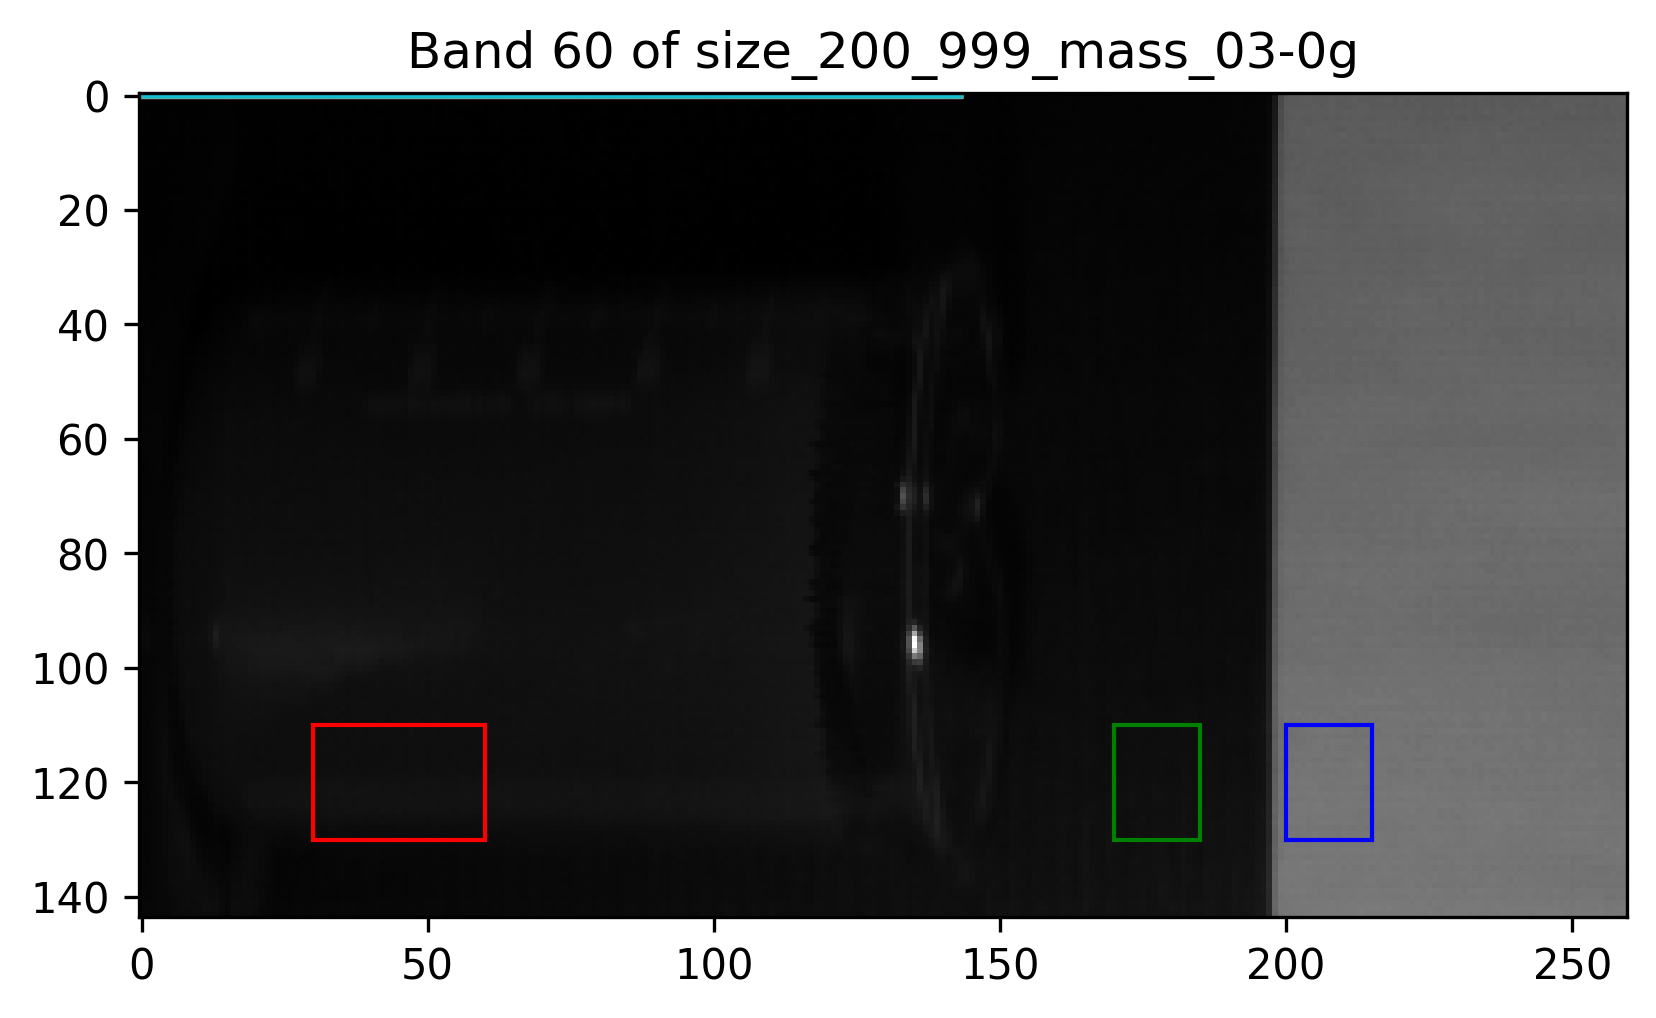

<Figure size 1920x1440 with 0 Axes>

57
57


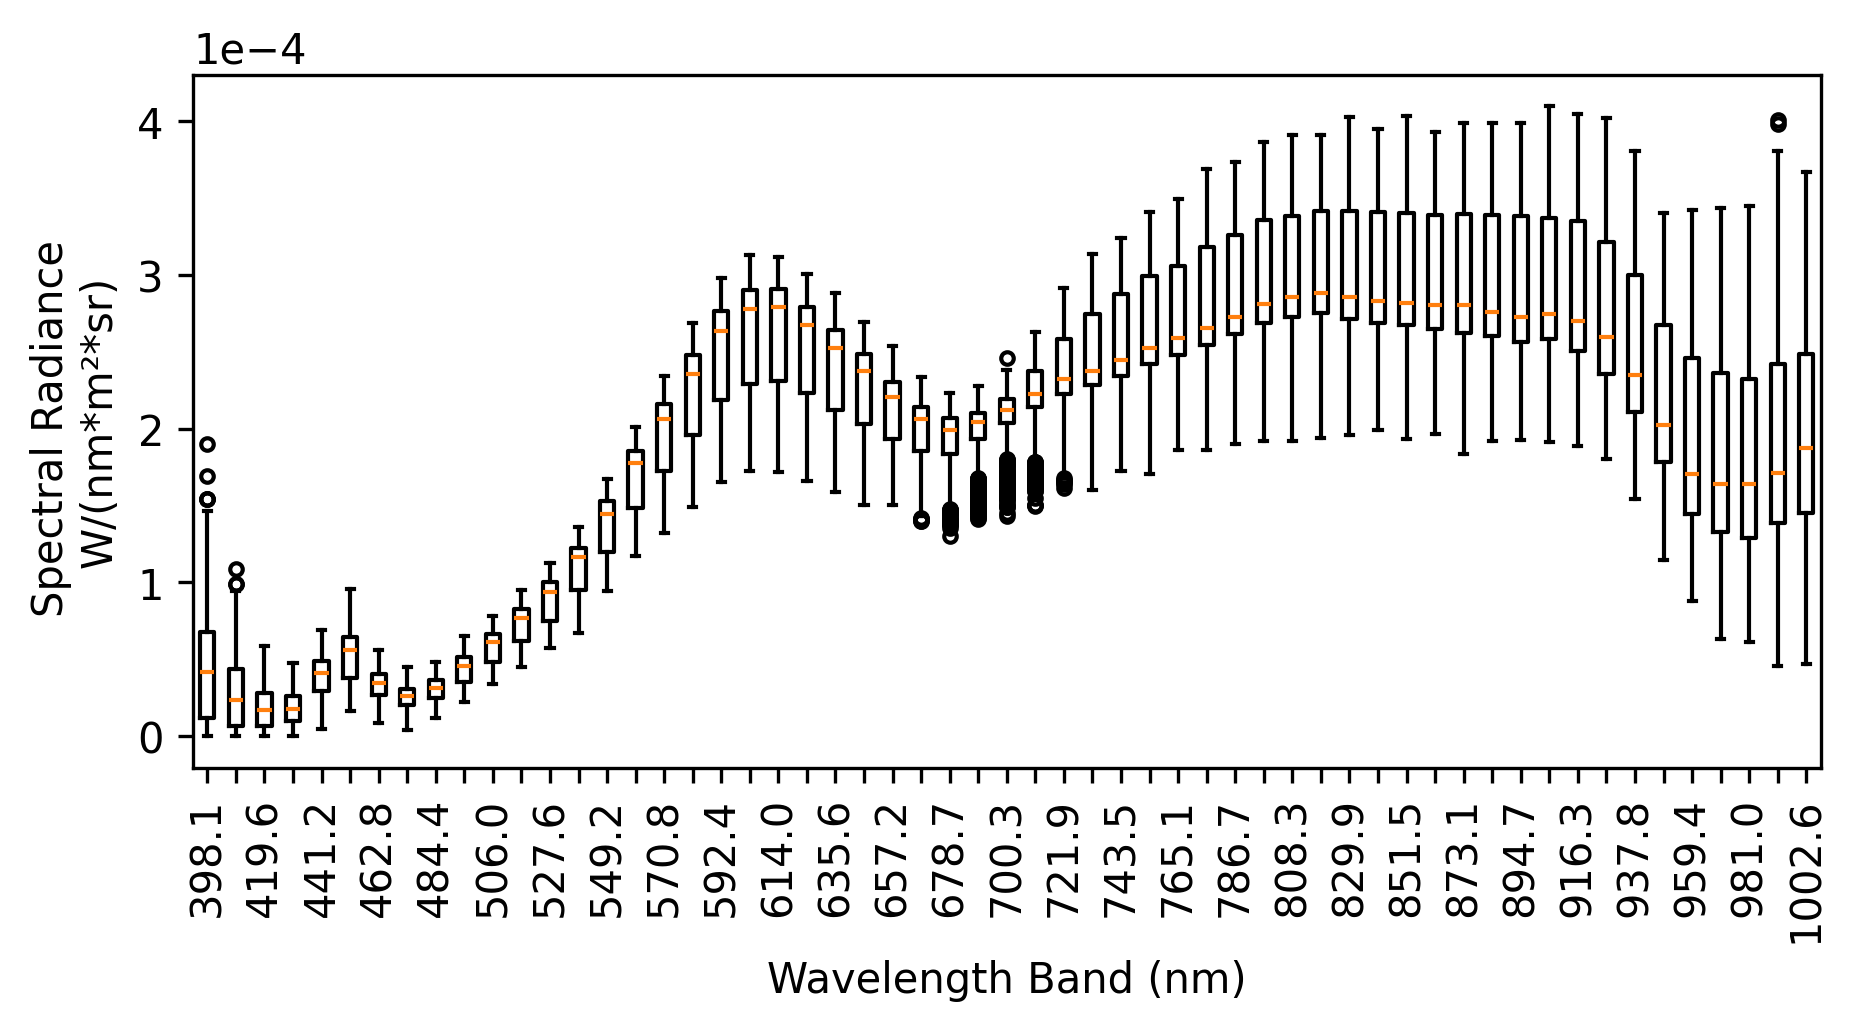

C:/Users/ADMIN//OneDrive - Rutgers University//HyperSpectral/DATA/2024-04-23-Sediment-Speed2-David\size_200_999_mass_05-0g_water_500mL_Baldur_V-1024N_SN10008_HSNR1_29900us_2024-04-23T203311_raw_rad_float32.hdr


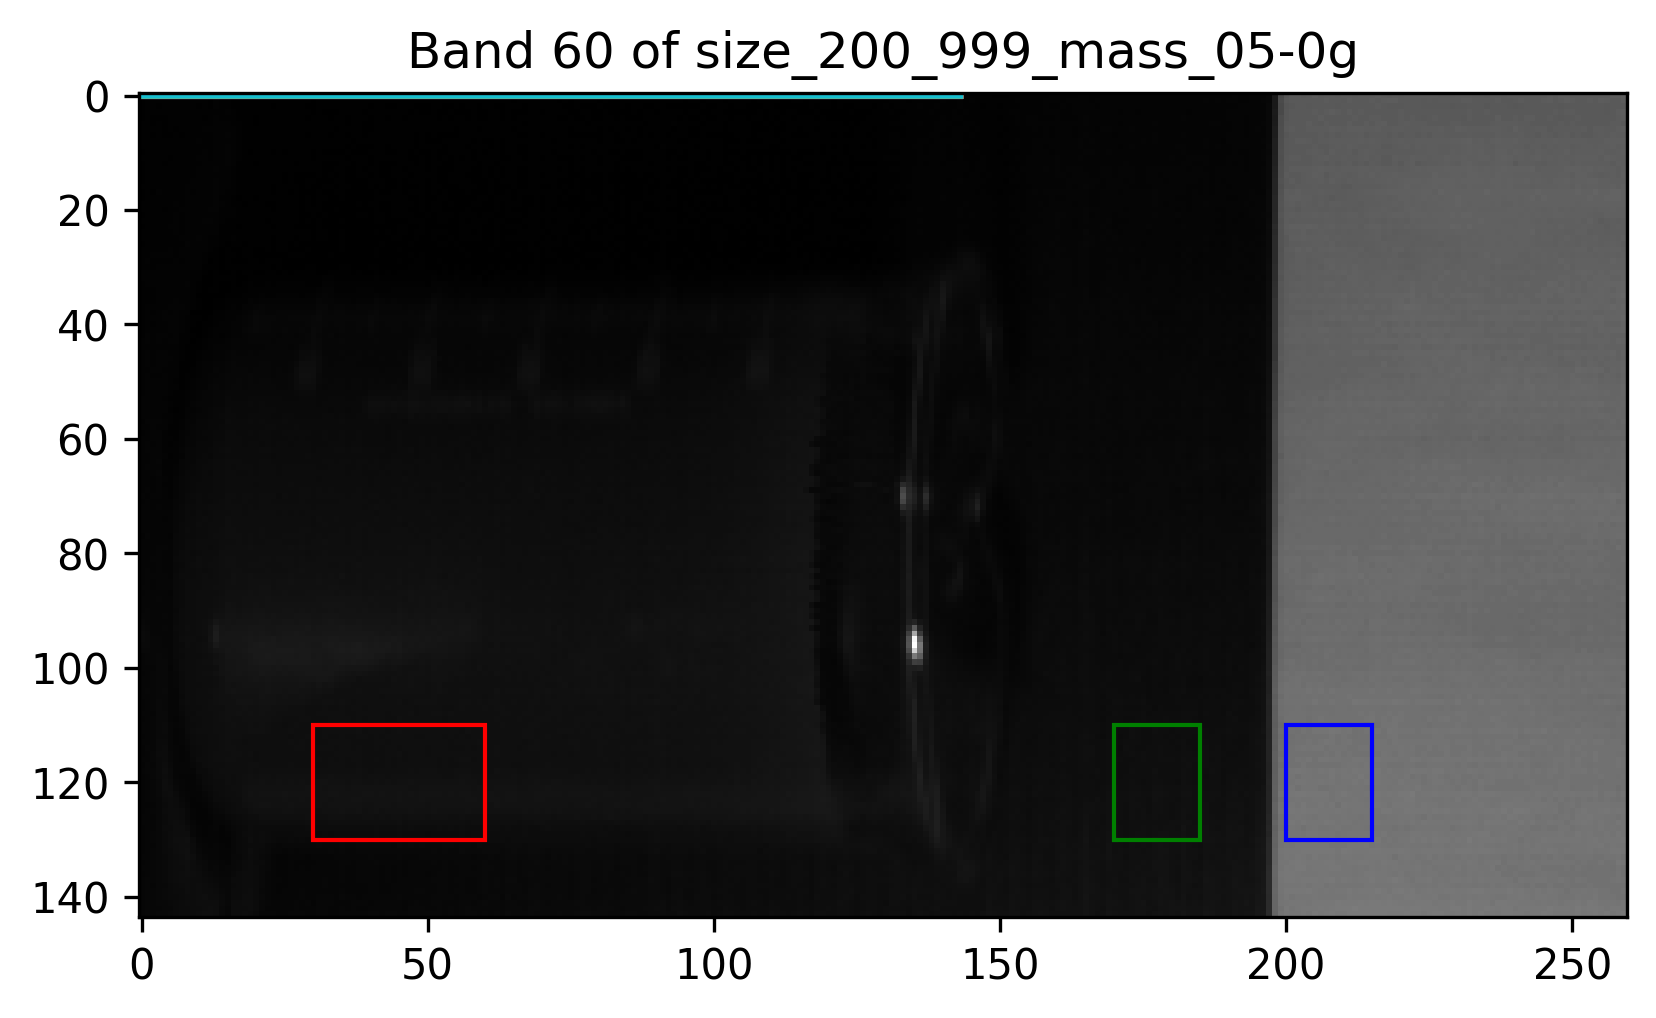

<Figure size 1920x1440 with 0 Axes>

57
57


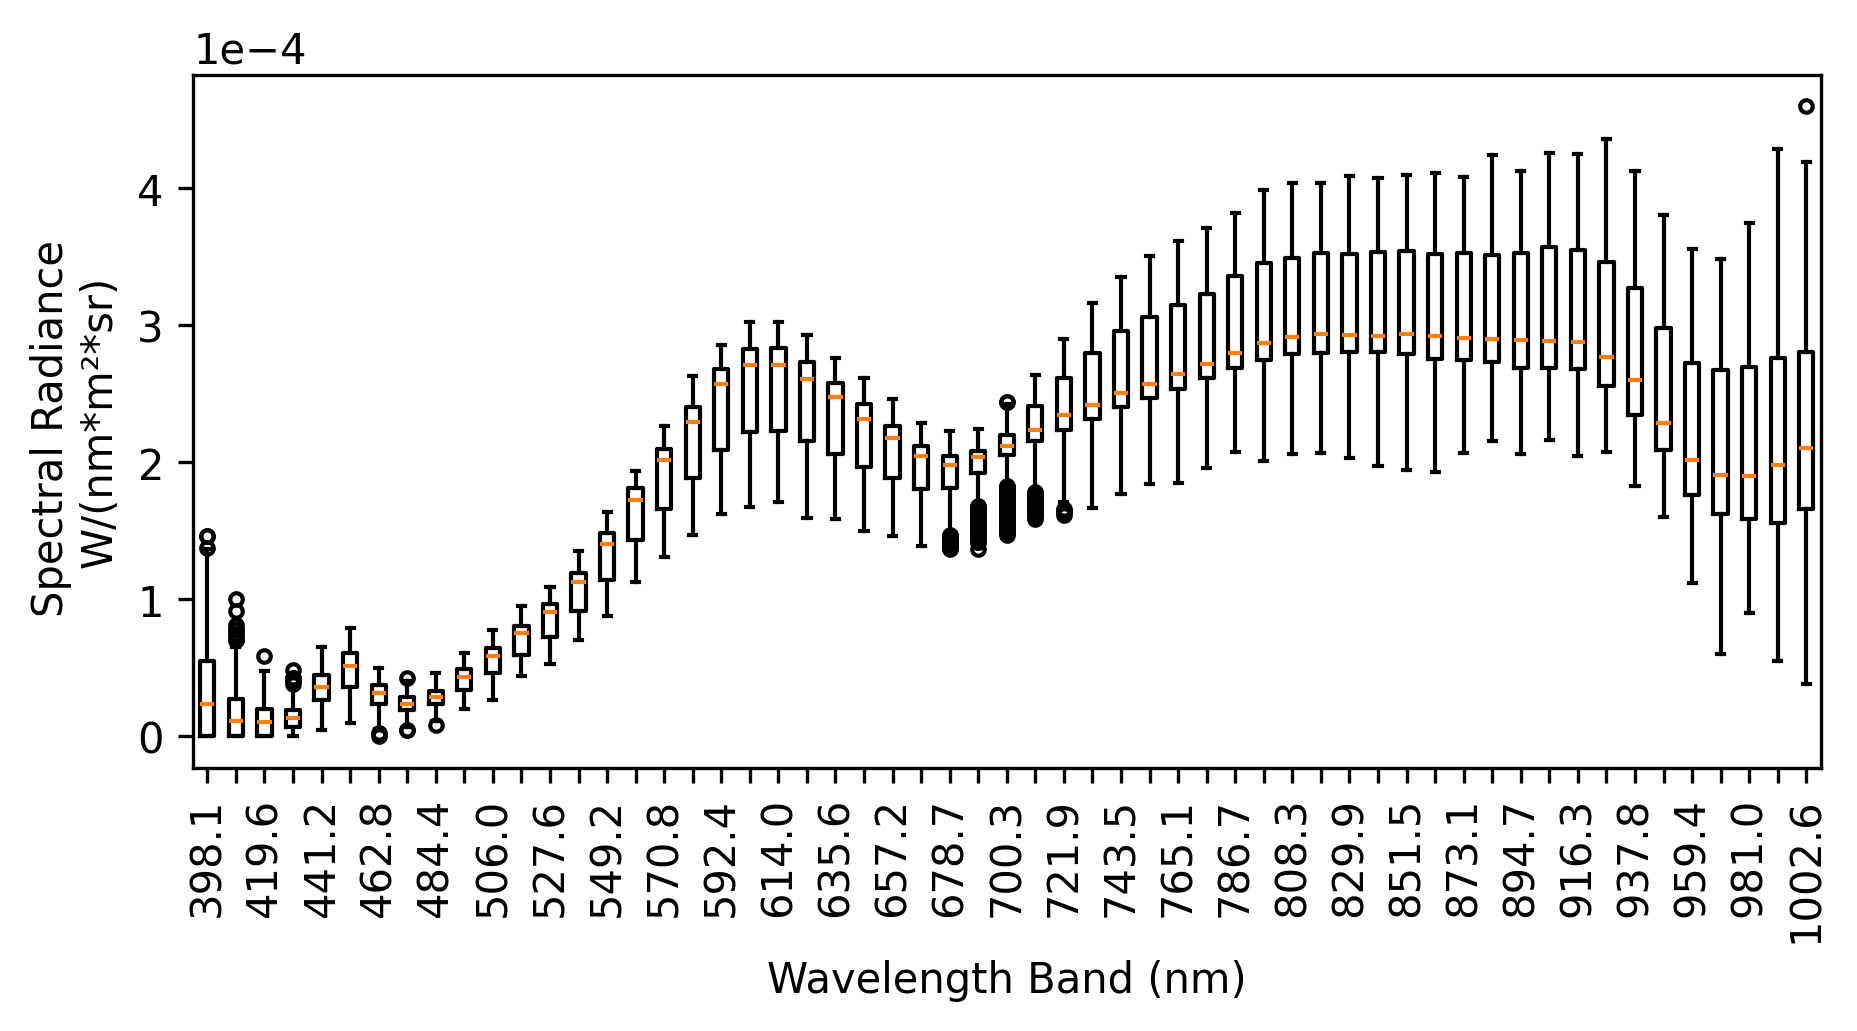

C:/Users/ADMIN//OneDrive - Rutgers University//HyperSpectral/DATA/2024-04-23-Sediment-Speed2-David\size_200_999_mass_05-0g_water_500mL_Baldur_V-1024N_SN10008_HSNR1_29900us_2024-04-23T203358_raw_rad_float32.hdr


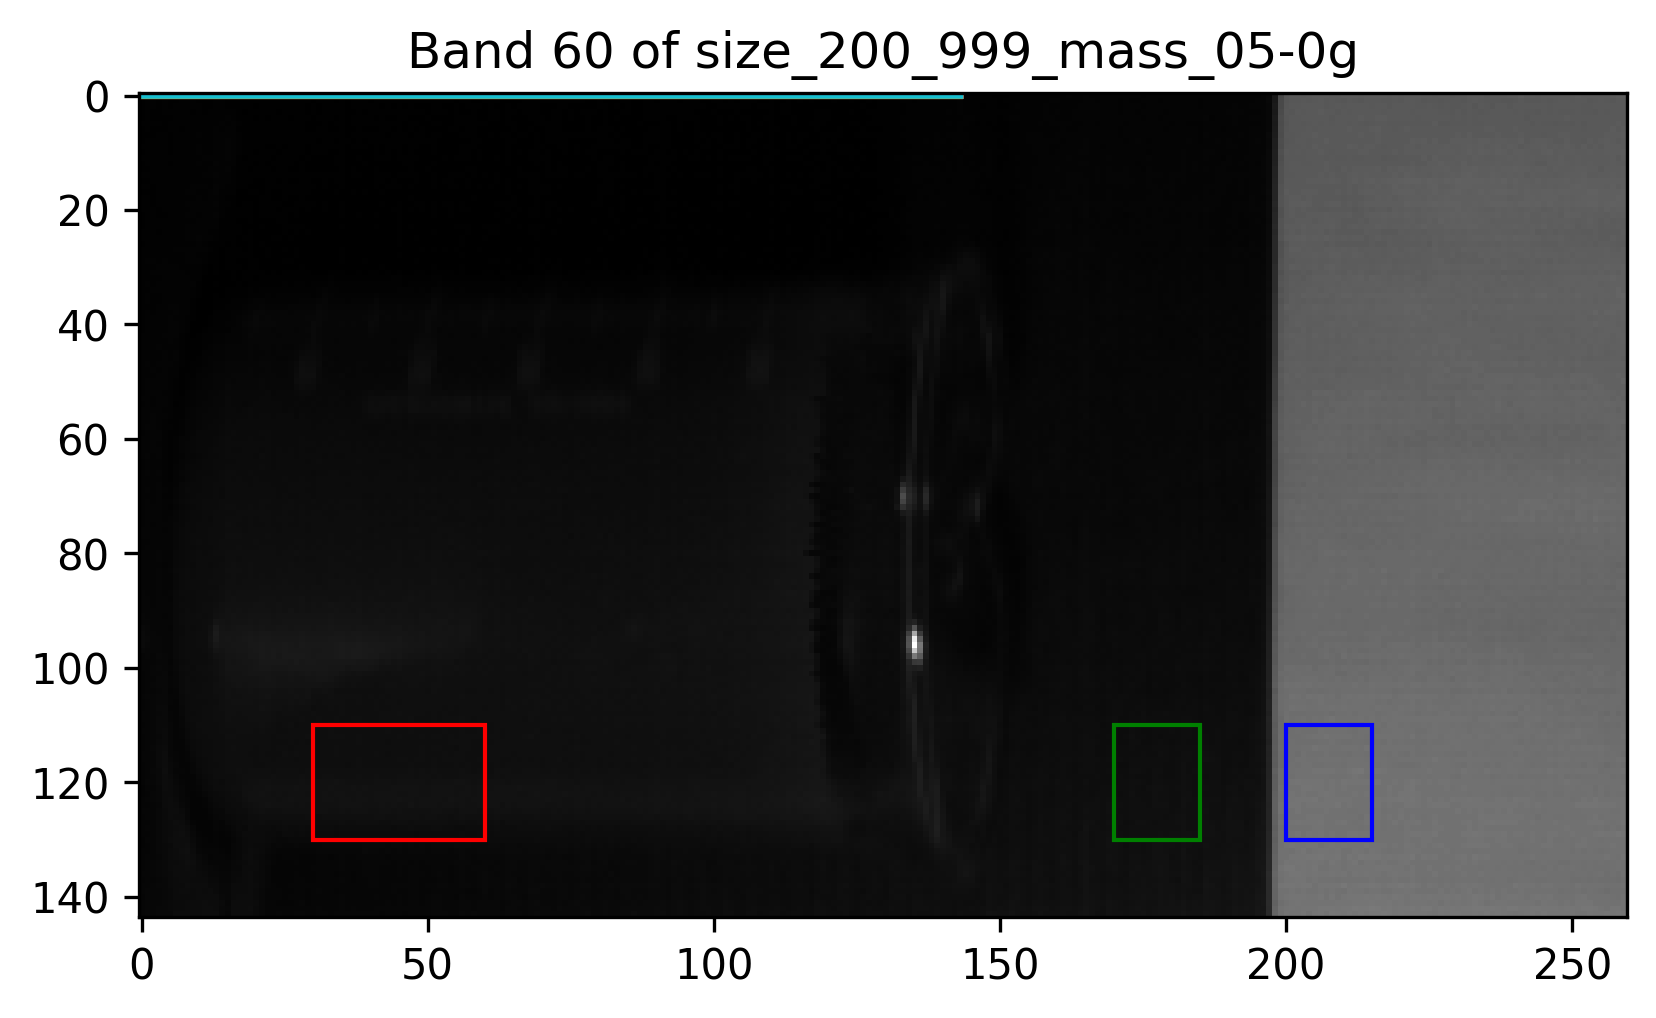

<Figure size 1920x1440 with 0 Axes>

57
57


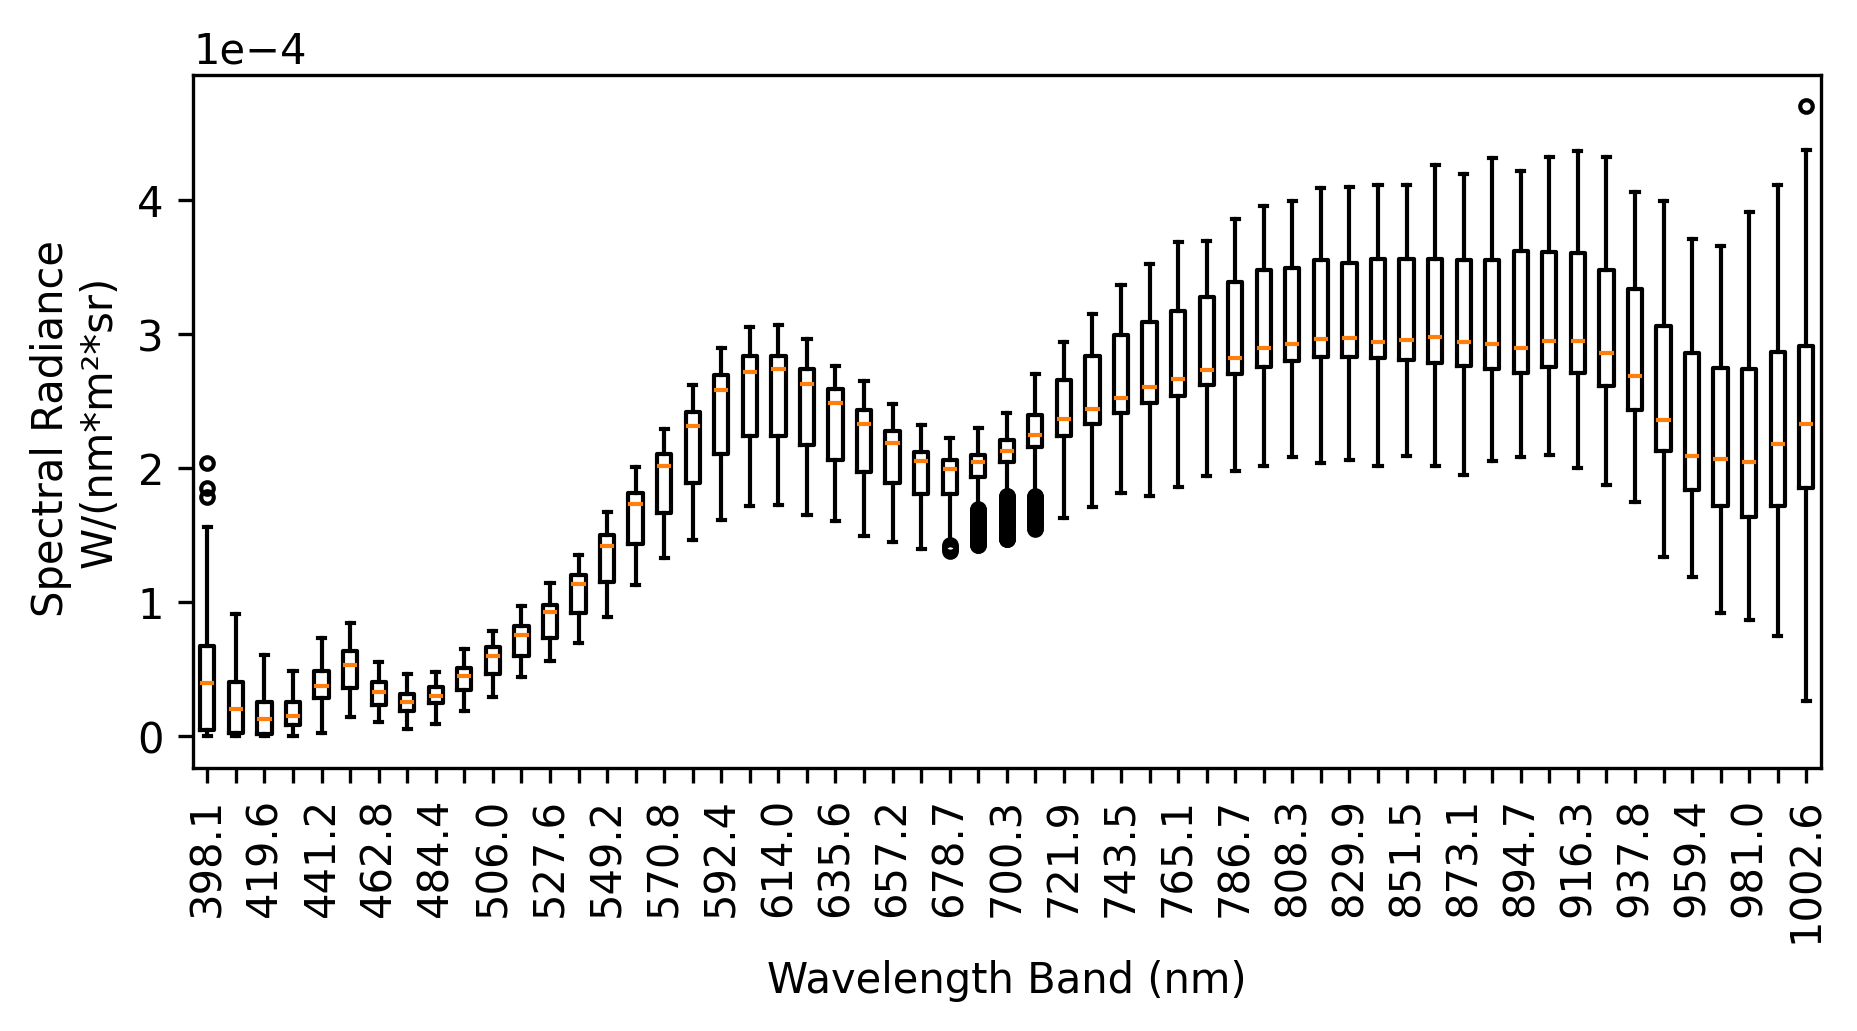

C:/Users/ADMIN//OneDrive - Rutgers University//HyperSpectral/DATA/2024-04-23-Sediment-Speed2-David\size_200_999_mass_10-0g_water_500mL_Baldur_V-1024N_SN10008_HSNR1_29900us_2024-04-23T203610_raw_rad_float32.hdr


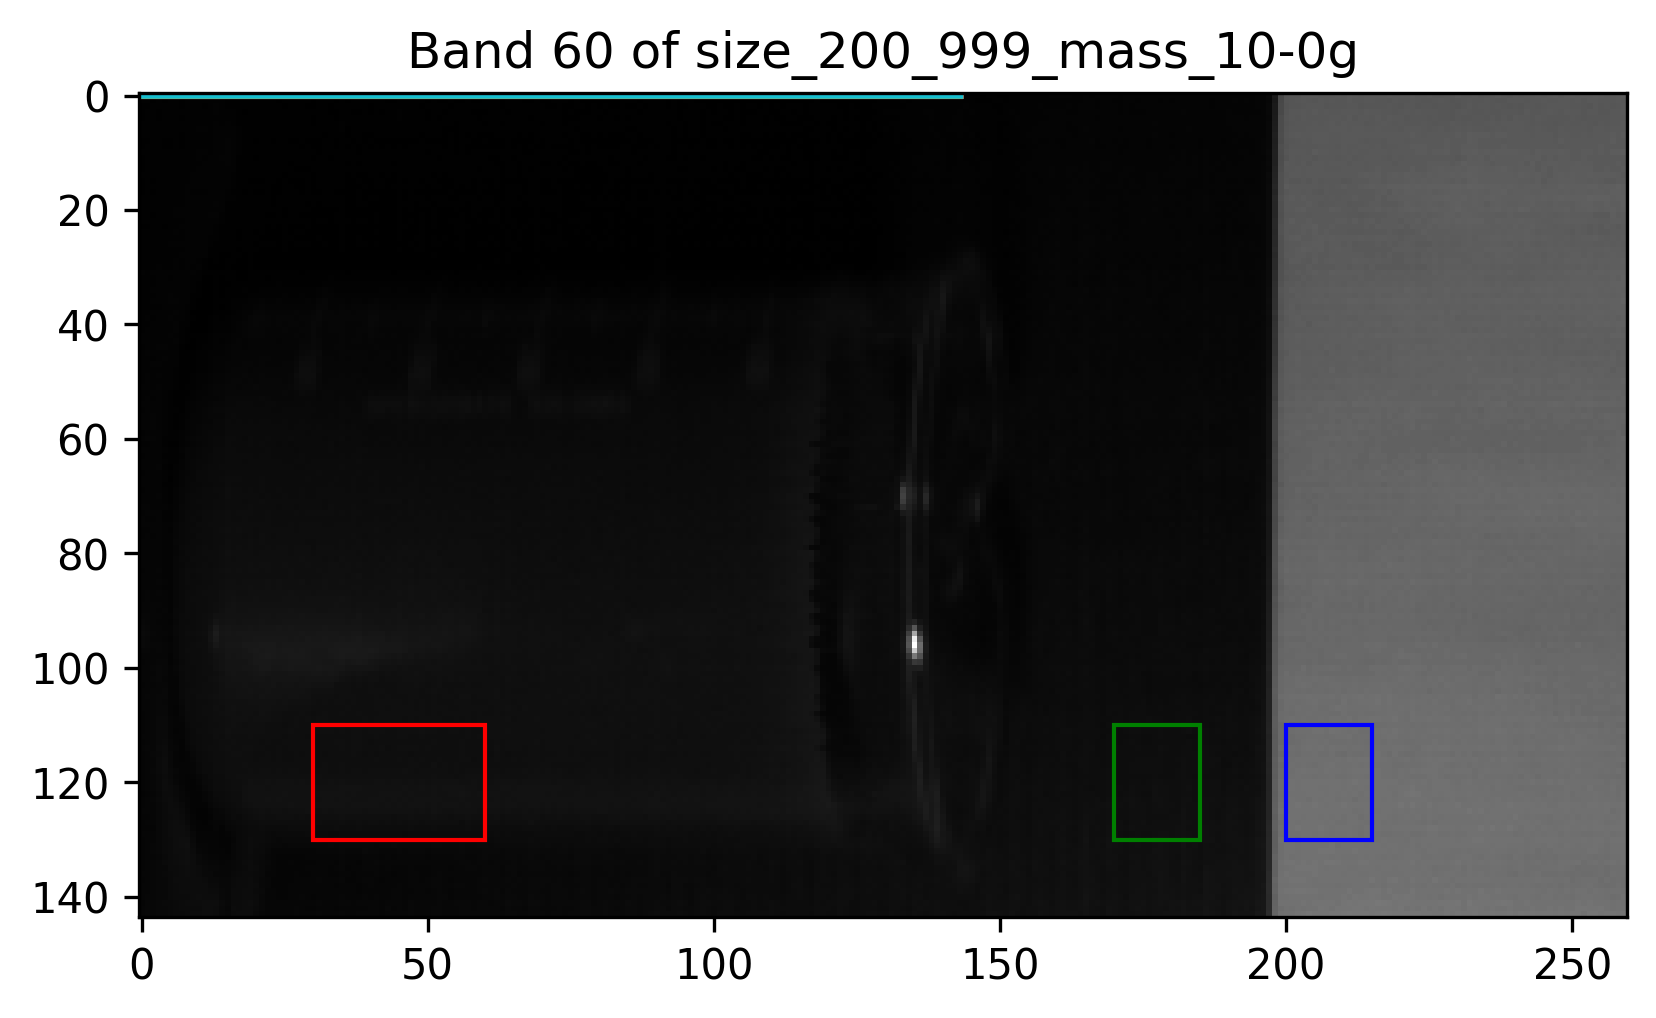

<Figure size 1920x1440 with 0 Axes>

57
57


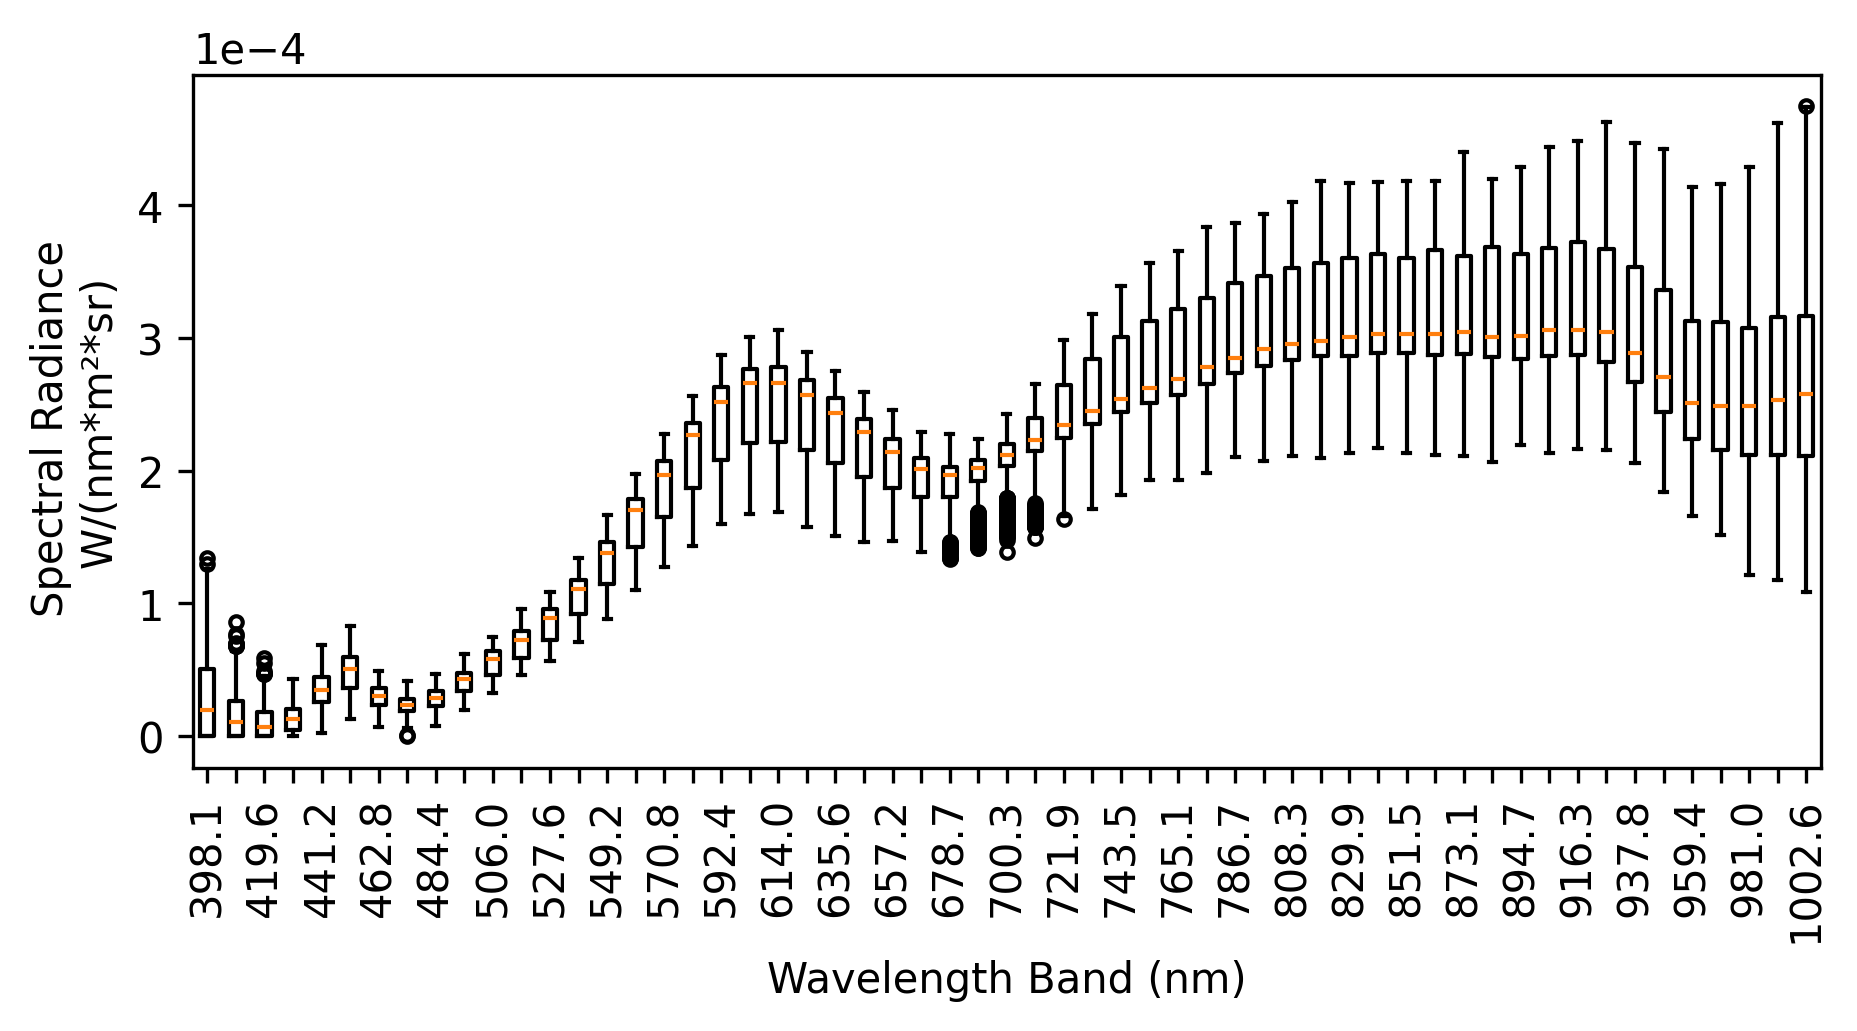

C:/Users/ADMIN//OneDrive - Rutgers University//HyperSpectral/DATA/2024-04-23-Sediment-Speed2-David\size_200_999_mass_10-0g_water_500mL_Baldur_V-1024N_SN10008_HSNR1_29900us_2024-04-23T203657_raw_rad_float32.hdr


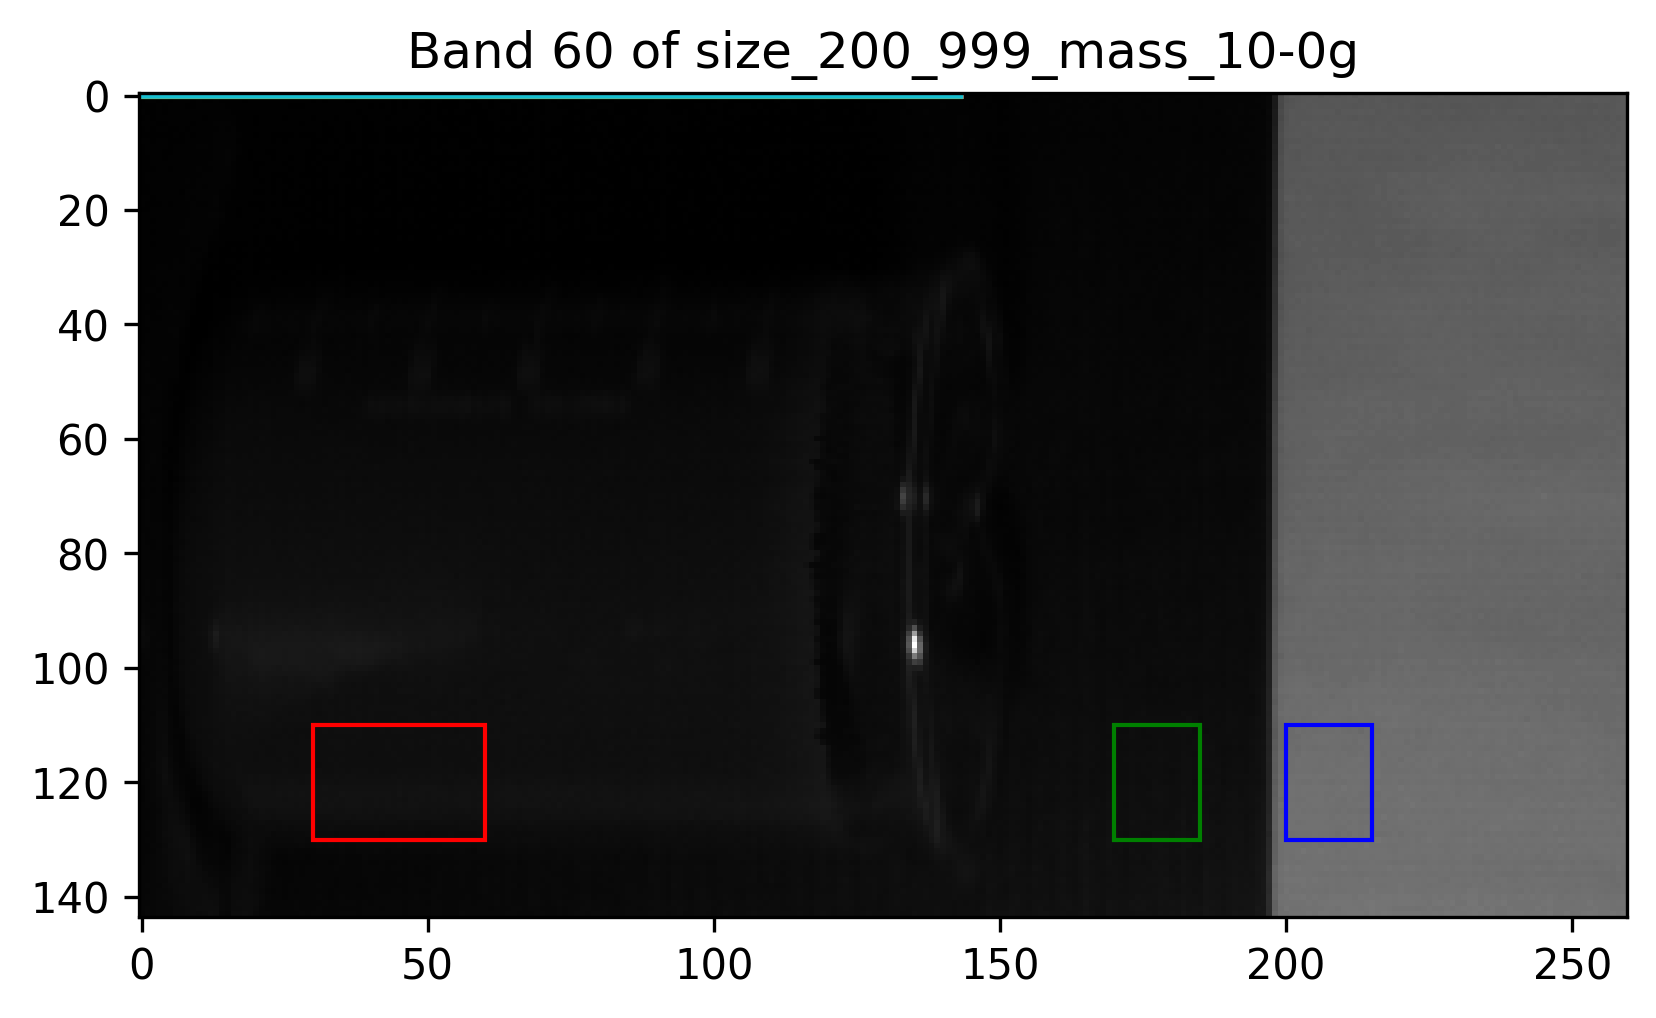

<Figure size 1920x1440 with 0 Axes>

57
57


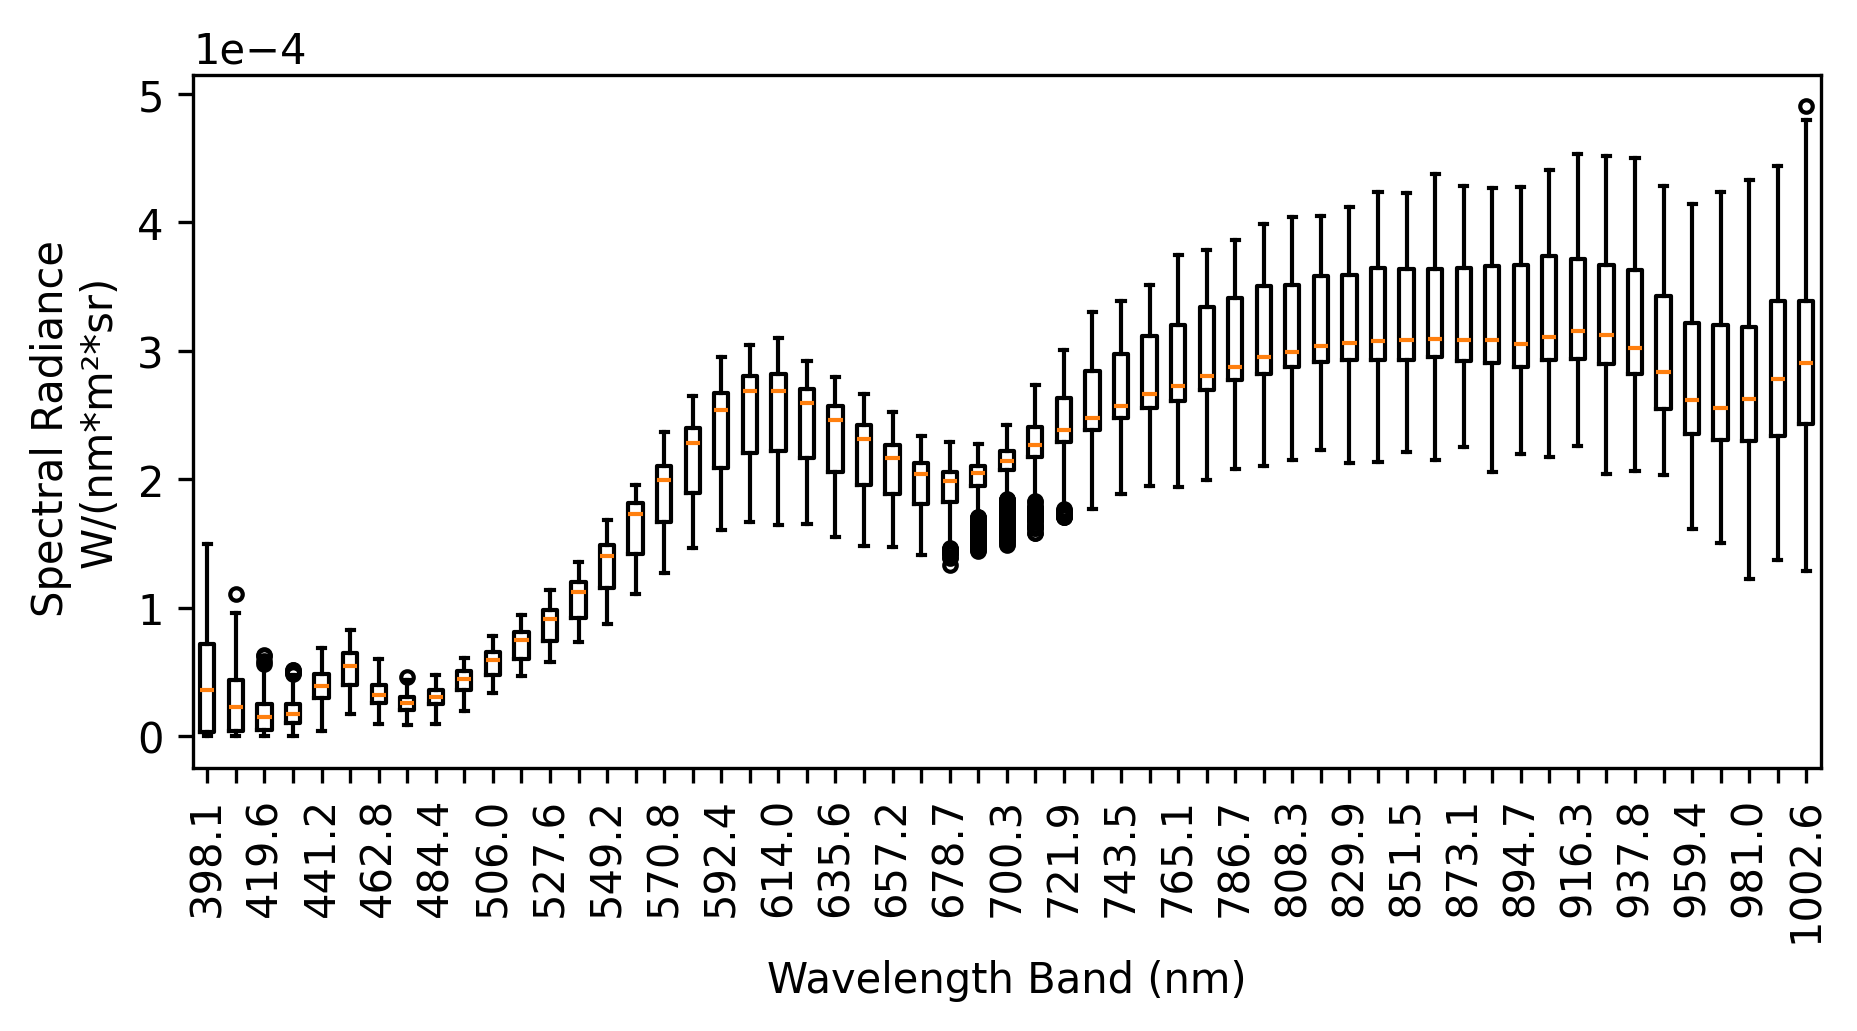

In [13]:

# beaker_list = []
# paper_list = []
# wall_list = []

file_list = []
metadata = []

all_beaker = []
all_beaker_compressed = []
all_beaker_compressed_std = []

all_paper = []
all_paper_compressed = []
all_paper_compressed_std = []

all_black = []
all_black_compressed = []
all_black_compressed_std = []

# metadata
labWorker = "David B."
mixerSpeed = 2
lightSource = 'incandescent-soft-40w'


# i = 0
for filename in sorted(glob.glob(project + '/*float32.hdr')):

    print(filename)
    img = envi.open(filename)

    #### TRIM IMAGE DOWN TO JUST THE BEAKER
    #### SELECT SUBSETS OF BEAKER AND CONTROL

    xtrim = 343
    img_trim = img[:,xtrim:xtrim + 260,:]

    #### IMAGE SUBSETS X Y X_WIDTH Y_WIDTH
    #### THESE ARE USER INPUTS

    bkr_x = 30;
    bkr_xw = 30;
    bkr_y = 110;
    bkr_yw = 20

    ppr_x = 200
    ppr_xw = 15
    ppr_y = bkr_y
    ppr_yw = bkr_yw

    blk_x = 170
    blk_xw = 15
    blk_y = bkr_y
    blk_yw = bkr_yw


    band = 60 # sample band for display purposes
    sizeIndex = filename.find('size')
    massIndex2 = filename.find('g_water')

    bandx = img_trim[:,:,band].squeeze()
    plt.imshow(bandx,cmap='gray',) #, vmin=0, vmax=255)
    plt.title('Band ' + str(band) + ' of ' + filename[sizeIndex:massIndex2+1] )
    plt.plot(bandx)
    plt.imshow(bandx,cmap='gray')
    ax = plt.gca()

    rect_beaker = Rectangle((bkr_x,bkr_y),bkr_xw, bkr_yw,linewidth=1,edgecolor='r',facecolor='none')
    rect_paper  = Rectangle((ppr_x,ppr_y),ppr_xw,ppr_yw,linewidth=1,edgecolor='b',facecolor='none')
    rect_black  = Rectangle((blk_x,blk_y),blk_xw,blk_yw,linewidth=1,edgecolor='g',facecolor='none')

    ax.add_patch(rect_beaker)
    ax.add_patch(rect_paper)
    ax.add_patch(rect_black)

    plt.figure()
    plt.show()

    beaker_slice = img_trim[bkr_y:bkr_y+bkr_yw, bkr_x:bkr_x+bkr_xw]
    paper_slice =  img_trim[ppr_y:ppr_y+ppr_yw, ppr_x:ppr_x+ppr_xw]
    black_slice =  img_trim[blk_y:blk_y+blk_yw, blk_x:blk_x+blk_xw]

    file_list.append(filename)
    all_beaker.append(beaker_slice)
    all_paper.append(paper_slice)
    all_black.append(black_slice)



    #### PARSE FILENAME STRING FOR META-DATA
    #### HARD CODED NUMBERS ASSUME CONSISTENT FILENAME STRUCTURE

    sizeIndex = filename.find('size')
    if (sizeIndex != -1):
      size1 = filename[sizeIndex + 5 : sizeIndex + 8]
      size2 = filename[sizeIndex + 9 : sizeIndex + 12]
    else:
      size1 = '0'
      size2 = '0'
    # print(size1)
    # print(size2)

    massIndex = filename.find('mass')
    massIndex2 = filename.find('g_water')
    if (massIndex != -1):
      mass = filename[massIndex + 5 : massIndex2]
      mass = mass.replace("-",".")
    else:
      mass = '0'
    # print(mass)

    waterIndex = filename.find('water')
    if (waterIndex != -1):
      water = filename[waterIndex + 6 : waterIndex + 9]
    else:
      water = '0'
    # print(water)

    dateIndex = filename.find('us_')
    if (dateIndex != -1):
      date = filename[dateIndex + 3 : dateIndex + 20]
    else:
      date = '0'
    # print(date)

    #### TODO
    #### STORE NUMBER OF PIXELS FOR THE SUBSET?
    #### STORE MIXER SPEED?

    metadata.append( [
        size1,
        size2,
        mass,
        water,
        date
      ] ) # 119


    #### COMRPESS 3D DATA INTO 1D

    bkr_compress = beaker_slice.copy()
    bkr_compress = np.mean(bkr_compress, axis=0) # average in x
    bkr_compress = np.mean(bkr_compress, axis=0) # average in y
    all_beaker_compressed.append(bkr_compress)

    ppr_compress = paper_slice.copy()
    ppr_compress = np.mean(ppr_compress, axis=0) # average in x
    ppr_compress = np.mean(ppr_compress, axis=0) # average in y
    all_paper_compressed.append(ppr_compress) #   all_paper_compressed.append(np.array(ppr_compress))

    blk_compress = black_slice.copy()
    blk_compress = np.mean(blk_compress, axis=0) # average in x
    blk_compress = np.mean(blk_compress, axis=0) # average in y
    all_black_compressed.append(blk_compress) #   all_paper_compressed.append(np.array(ppr_compress))

    #### GET ST.DEV FOR EACH BAND

    bkr_stds = []
    for band in range(0,len(bands)):
      bkr_stds.append(np.std(beaker_slice[:,:,band]))
    all_beaker_compressed_std.append(bkr_stds) #   all_beaker_compressed_std.append(np.array(bkr_stds))

    ppr_stds = []
    for band in range(0,len(bands)):
      ppr_stds.append(np.std(paper_slice[:,:,band]))
    all_paper_compressed_std.append(ppr_stds)

    blk_stds = []
    for band in range(0,len(bands)):
      blk_stds.append(np.std(black_slice[:,:,band]))
    all_black_compressed_std.append(blk_stds)


    #### PLOT BOXPLOTS FOR EACH BAND FOR EACH IMAGE
    boxplot_x = []
    boxplot_labels = []
    fig = plt.figure(figsize=(7, 3))
    for i in range(0,beaker_slice.shape[2]):
      if (i % 2 == 0):
        boxplot_x.append(beaker_slice[:,:,i].flatten())

        if len(boxplot_labels) % 2 != 0:
          boxplot_labels.append("")
        else:
          boxplot_labels.append(round(bands[i],1))

    print(len(boxplot_x))
    print(len(boxplot_labels))

    plt.boxplot(boxplot_x, labels=boxplot_labels, sym=".")
    # sizeIndex = files0[x].find('size')
    # plt.title(files0[x][sizeIndex:sizeIndex+33],fontsize = 20)
    plt.xlabel('Wavelength Band (nm)')
    plt.ticklabel_format(axis='y', style='sci', scilimits=(-4,-4))
    plt.ylabel('Spectral Radiance \nW/(nm*m²*sr)')
    plt.xticks(rotation = 90)
    plt.show()


In [16]:

#### COMBINE ALL DATA INTO A SINGLE DATAFRAME AND SAVE AS CSV

df0 = pd.DataFrame(all_beaker_compressed, columns=np.around(bands,2), dtype = float)
df1 = pd.DataFrame(all_beaker_compressed_std, columns=np.around(bands,2), dtype = float)

df2 = pd.DataFrame(all_paper_compressed,  columns=np.around(bands,2), dtype = float)
df3 = pd.DataFrame(all_paper_compressed_std,  columns=np.around(bands,2), dtype = float)

df4 = pd.DataFrame(all_black_compressed,  columns=np.around(bands,2), dtype = float)
df5 = pd.DataFrame(all_black_compressed_std,  columns=np.around(bands,2), dtype = float)


dfx = pd.DataFrame(metadata, columns=['sieve_size1','sieve_size2','mass_g','volume_mL','date'])
# dfx['sed_size'] = dfx['sed_size'].astype(float)
dfx['mass_g'] = dfx['mass_g'].astype(float)
dfx['volume_mL'] = dfx['volume_mL'].astype(float)
dfx['date'] = dfx['date'].astype('datetime64[ns]')

dfx['speed'] = ''
dfx['speed'] = mixerSpeed
dfx['washed'] = ''
dfx['washed'] = 'washed'
dfx['lightSource'] = ''
dfx['lightSource'] = lightSource
dfx['labWorker'] = ''
dfx['labWorker'] = labWorker

df_a = dfx.copy()
df_a['data_control'] = ''
df_a['data_control'] = 'data'
df_a = df_a.merge(df0, left_index=True,right_index=True)

df_b = dfx.copy()
df_b['data_control'] = ''
df_b['data_control'] = 'data_std'
df_b = df_b.merge(df1, left_index=True,right_index=True)

df_c = dfx.copy()
df_c['data_control'] = ''
df_c['data_control'] = 'control_white'
df_c = df_c.merge(df2, left_index=True,right_index=True)

df_d = dfx.copy()
df_d['data_control'] = ''
df_d['data_control'] = 'control_white_std'
df_d = df_d.merge(df3, left_index=True,right_index=True)

df_e = dfx.copy()
df_e['data_control'] = ''
df_e['data_control'] = 'control_black'
df_e = df_e.merge(df4, left_index=True,right_index=True)

df_f = dfx.copy()
df_f['data_control'] = ''
df_f['data_control'] = 'control_black_std'
df_f = df_f.merge(df5, left_index=True,right_index=True)

dfz = pd.concat([df_a,df_b,df_c,df_d,df_e,df_f])


dfz['sieve_size1'] = pd.to_numeric(dfz['sieve_size1'])
dfz['sieve_size2'] = pd.to_numeric(dfz['sieve_size2'])
dfz['mass_g'] = pd.to_numeric(dfz['mass_g'])
dfz['volume_mL'] = pd.to_numeric(dfz['volume_mL'])

dfz.reset_index(inplace=True,drop=True)


## CONVERT SIEVE SIZE TO UM

dfz['sed_size1_um'] = ''
dfz.loc[ (dfz['sieve_size1'] == 0), 'sed_size1_um'] = 0
dfz.loc[ (dfz['sieve_size1'] == 20), 'sed_size1_um'] = 850
dfz.loc[ (dfz['sieve_size1'] == 40), 'sed_size1_um'] = 425
dfz.loc[ (dfz['sieve_size1'] == 60), 'sed_size1_um'] = 250
dfz.loc[ (dfz['sieve_size1'] == 100), 'sed_size1_um'] = 150
dfz.loc[ (dfz['sieve_size1'] == 200), 'sed_size1_um'] = 75

dfz['sed_size2_um'] = ''
dfz.loc[ (dfz['sieve_size2'] == 0), 'sed_size2_um'] = 0
dfz.loc[ (dfz['sieve_size2'] == 40), 'sed_size2_um'] = 425
dfz.loc[ (dfz['sieve_size2'] == 60), 'sed_size2_um'] = 250
dfz.loc[ (dfz['sieve_size2'] == 100), 'sed_size2_um'] = 150
dfz.loc[ (dfz['sieve_size2'] == 200), 'sed_size2_um'] = 75
dfz.loc[ (dfz['sieve_size2'] == 999), 'sed_size2_um'] = 0

dfz['sed_size_avg_um'] = ''
dfz['sed_size_avg_um'] = (dfz['sed_size1_um'] + dfz['sed_size2_um']) / 2

dfz['sed_size1_um'] = pd.to_numeric(dfz['sed_size1_um'])
dfz['sed_size2_um'] = pd.to_numeric(dfz['sed_size2_um'])
dfz['sed_size_avg_um'] = pd.to_numeric(dfz['sed_size_avg_um'])

dfz.head()
## END CONVERT SIEVE SIZE TO um


## ESTIMATE THE NUMBER OF PARTICLES FROM MASS AND AVG DIAMETER

dfz['particle_vol_cm³'] = ''
dfz['particle_mass_g'] = ''
dfz['log_particle_count'] = ''

# mass of particle in g/cm^3
density = 2.65
dfz['particle_vol_cm³'] = ( 4/3 * 3.1416 * ( dfz['sed_size_avg_um'] / 1000 / 10 / 2 ) ** 3 )
dfz['particle_mass_g'] = dfz['particle_vol_cm³'] * density
dfz['log_particle_count'] = np.log10(dfz['mass_g'] / dfz['particle_mass_g'])

# dfz.loc[dfz['particle_count'] == np.nan] = 0
dfz['log_particle_count'] = dfz['log_particle_count'].fillna(0)

dfz['particle_vol_cm³'] = pd.to_numeric(dfz['particle_vol_cm³'])
dfz['particle_mass_g'] = pd.to_numeric(dfz['particle_mass_g'])
dfz['log_particle_count'] = pd.to_numeric(dfz['log_particle_count'])

## END ESTIMATE THE NUMBER OF PARTICLES FROM MASS AND AVG DIAMETER



## CONCENTRATION

dfz['concentration_g/L'] = ''
dfz['concentration_g/L'] = dfz['mass_g']/dfz['volume_mL'] * 1000

## END CONCENTRATION


cols = dfz.columns.tolist()
dfz = dfz[cols[0:2] + cols[-7:] + cols[2:-7]]

# exclude bad data
# dfz = dfz.loc[ (dfz.sed_size != "200") ]

#### TODO - UNIVERSAL OUTPUT FILE NAME FORMAT?

fname_out = project + '/' + date + '-sediments.csv'
dfz.to_csv(fname_out,index=False)
print(f'data written to {fname_out}')
dfz

data written to C:/Users/ADMIN//OneDrive - Rutgers University//HyperSpectral/DATA/2024-04-23-Sediment-Speed2-David//2024-04-23-sediments.csv


sieve_size1  sieve_size2  sed_size1_um  sed_size2_um  sed_size_avg_um  \
0             0            0             0             0              0.0   
1           200          999            75             0             37.5   
2           200          999            75             0             37.5   
3           200          999            75             0             37.5   
4           200          999            75             0             37.5   
5           200          999            75             0             37.5   
6           200          999            75             0             37.5   
7           200          999            75             0             37.5   
8           200          999            75             0             37.5   
9           200          999            75             0             37.5   
10          200          999            75             0             37.5   
11          200          999            75             0             37.5   
12          200          999            75             0             37.5   
13            0            0             0             0              0.0   
14          200          999            75             0             37.5   
15          200          999            75             0             37.5   
16          200          999            75             0             37.5   
17          200          999            75             0             37.5   
18          200          999            75             0             37.5   
19          200          999            75             0             37.5   
20          200          999            75             0             37.5   
21          200          999            75             0             37.5   
22          200          999            75             0             37.5   
23          200          999            75             0             37.5   
24          200          999            75             0             37.5   
25          200          999            75             0             37.5   
26            0            0             0             0              0.0   
27          200          999            75             0             37.5   
28          200          999            75             0             37.5   
29          200          999            75             0             37.5   
30          200          999            75             0             37.5   
31          200          999            75             0             37.5   
32          200          999            75             0             37.5   
33          200          999            75             0             37.5   
34          200          999            75             0             37.5   
35          200          999            75             0             37.5   
36          200          999            75             0             37.5   
37          200          999            75             0             37.5   
38          200          999            75             0             37.5   
39            0            0             0             0              0.0   
40          200          999            75             0             37.5   
41          200          999            75             0             37.5   
42          200          999            75             0             37.5   
43          200          999            75             0             37.5   
44          200          999            75             0             37.5   
45          200          999            75             0             37.5   
46          200          999            75             0             37.5   
47          200          999            75             0             37.5   
48          200          999            75             0             37.5   
49          200          999            75             0             37.5   
50          200          999            75             0             37.5   


In [14]:


# #### COMBINE ALL DATA INTO A SINGLE DATAFRAME AND SAVE AS CSV

# df0 = pd.DataFrame(all_beaker_compressed, columns=np.around(bands,2), dtype = float)
# df1 = pd.DataFrame(all_paper_compressed,  columns=np.around(bands,2), dtype = float)
# df2 = pd.DataFrame(all_beaker_compressed_std, columns=np.around(bands,2), dtype = float)
# df3 = pd.DataFrame(all_paper_compressed_std,  columns=np.around(bands,2), dtype = float)

# dfx = pd.DataFrame(metadata, columns=['sed_size1','sed_size2','mass_g','volume_mL','date'])
# # dfx['sed_size'] = dfx['sed_size'].astype(float)
# dfx['mass_g'] = dfx['mass_g'].astype(float)
# dfx['volume_mL'] = dfx['volume_mL'].astype(float)
# dfx['date'] = dfx['date'].astype('datetime64[ns]')
# dfx['speed'] = ''
# dfx['speed'] = mixerSpeed
# dfx['washed'] = ''
# dfx['washed'] = 'washed'
# dfx['labWorker'] = ''
# dfx['labWorker'] = labWorker
# dfx['lightSource'] = ''
# dfx['lightSource'] = lightSource



# dfa = dfx.copy()
# dfa['data_control'] = ''
# dfa['data_control'] = 'data'
# dfa = dfa.merge(df0, left_index=True,right_index=True)

# dfb = dfx.copy()
# dfb['data_control'] = ''
# dfb['data_control'] = 'control'
# dfb = dfb.merge(df1, left_index=True,right_index=True)

# dfc = dfx.copy()
# dfc['data_control'] = ''
# dfc['data_control'] = 'data_std'
# dfc = dfc.merge(df2, left_index=True,right_index=True)

# dfd = dfx.copy()
# dfd['data_control'] = ''
# dfd['data_control'] = 'control_std'
# dfd = dfd.merge(df3, left_index=True,right_index=True)

# dfz = pd.concat([dfa,dfb,dfc,dfd])

# # exclude bad data
# # dfz = dfz.loc[ (dfz.sed_size != "200") ]


# #### TODO - UNIVERSAL OUTPUT FILE NAME FORMAT?

# fname_out = project + '/sediments.csv'
# dfz.to_csv(fname_out,index=False)
# print(f'data written to {fname_out}')
# dfz